<a href="https://colab.research.google.com/github/KLeeDE/PUS2020_KLee/blob/master/Project/Final/20201218_SPPA667_Wilimington_fldrisk_finalreport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Urban Flood Risk and Social Vulnerability Assessment in Wilmington, Delaware: A Comparative Study of Machine Learning Techniques**



**Main Author**: Kyungmin Lee 

**Date**: 12/18/2020 (Fall 2020)

**Note**: This note is prepared for the final project in the Urban Evidence Based Policy class (SPPA667)

#**Abstract**

 Analysis between flood risk and socioeconomic status has been researched in various nations, which presented the vulnerable people, who belong to groups within society that is either oppressed or more susceptible to harm, are more exposed to the uraban flood risk. However, the issue, whether vulnerable people living in the Wilmington city are exposed to flood risk, has not been researched in case of the City of Wilimington in Delaware. Therefore, this research aims to analyze flood risk and socioeconomic and demographic status and find out whether vulnerable people are living in the urban flood risk zone and predict the future flood risk impact based on 2014-2018 census data. This research conducted data correlation analysis, geospatial analysis between flood risk and socioeconomic and demographic data, and applied machine learning techniques for prediction. As for the machine learning techniques, this research used random forest classifier, logistic regression classification, and random forest regressor, and compared the model accuracy. As a result, this research finds out the low median income household, people not white, and people living under poverty line are more exposed to the urban flood risk in Wilmington. However, the random forest classifier and the logistic regression classification show too high model accuracy, while the random forest regressor shows too low model accuracy. Although there are significant limitations, this research implies that the vulnerable people are exposed to the flood risk in Wilmington. During the policy-making decision process, the state government may have to consider the vulnerable people and flood risk in the local climate adaptation policy. 



#**Contents**

1. Introduction
2. Background
3. Data Description
4. Method
5. Analysis Results
6. Discussion and Conclusoin

#**1. Introduction**

 Analysis between flood risk and socioeconomic status has been researched in various nations, which presented the vulnerable people, who belong to groups within society that is either oppressed or more susceptible to harm, are more exposed to the uraban flood risk. The urban flood risk is important in terms of the environmental justice and vulnerability to protect minority. It is because the vulnerable people are more exposed to the flood risk and more suceptible to disaster such as the flood (Eisenman et al., 2007; Walker et al., 2011; Maantay et al., 2009), which should be considered during the policy making process. However, urban flood risk and social assessment has not been studied in the urban area in Delaware, where the state is in the east coast area and exposed to the annual flood risk. Therefore, this research aims to conduct geospatial analysis of the urban flood risk and social vulnerability in Wilmington and find out the applicable machine learning techniques for the future studies. 


#**2. Background**


The flood risk and socioeconomic status has been researched in various nations.The previous studies analyzed the relationship between flood risk and socioeconomic status using machine learning techniques at the urban city level. For example, Eini et al. (2020) conducted hazard and urban flood risk mapping using Maximum Entropy (MaxEnt), and Genetic Algorithm Rule-Set Production (GARP) and evaluated the role of urban districts in Kemanchah city, Iran. Chakraborty et al. (2020) analyzed the social vulnerability to flood hazards in the context of environmental justice in Canada using sampling adequacy and variance test. Drabi et al. (2019) analyzed the urban flood risk mapping using the GARP and Quick Unbiased Efficient Statistical Tree (QUEST) models and compare the machine learning techniques.

 However, the City of Wilimington in Delaware has not been researched. Also, it has not been researched based on the urban evidence-based policy. This purpose of this research is to find out the circumstances of the socioeconomic and demographic status is in the flood zone and suggest policy implications.Therefore, this research aims to answer the following question: Are vulnerable people living in the Wilmington city exposed to flood risk?

This research is conducted based on the approach of urban evidence-based policy. The Evidence Based Policy is to make more defensibly policy decisions based on conscientious, explicit, and judicious use of scientific evidence by using science (Big Data and machine learning) as evidence in public policy [(Straf et al., 2012). In this way it is useful for policy makers  by providing insights into which policy interventions are most likely to lend desirable outcomes (Androutsopoulou et al., 2018).

In this research, a vulnerable person can be defined as someone who belongs to a group within society that is either oppressed or more susceptible to harm. Eagly describes vulnerable persons as persons belonging to populations such as children, senior citizens, low income workers, and asylum seekers. The United Nations Convention on the Rights of the Child defines child as "a human being below the age of 18 years unless under the law applicable to the child, majority is attained earlier" Medicare enrollees aged 65 years.



#**3. Data Description**

**Available data**

Wilmington data

1. Flood Depth Grid (2014/Raster/Federal Emergency Management Agency (FEMA)
*  CstDpthxxxpct: Coastal flood depth for the xxx percent
annual chance flood event. This raster is
required to be produced for coastal Flood
Risk Projects. [Feet]

2. Census Data Block Group (2016/CSV/U.S.Census Bureau)

3. Socioeconomic and Demographic (SED) data (2014 (ACS5) / Shapefile / U.S. Census Bureau)



## (cf) Raw Data Preparation & Description

In [1]:
#@Data preparation

# mount drive
from google.colab import drive
drive.mount('/content/drive')

# install geospatial packages
!sudo apt install libspatialindex-dev
!pip install rtree
!pip install geopandas
!pip install censusdata

import time
import geopandas as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gdal
from gdalconst import *
from shapely.geometry import Point
from collections import Counter
import censusdata
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (15,10)

# Set plotting conditions
def label_plot(plot_axis, title, x_axis_label, y_axis_label, title_weight="bold", title_size=16, axis_weight="bold", axis_size=14 ):
  plot_axis.set_title(title, weight=title_weight, size=title_size)
  plot_axis.set_xlabel(x_axis_label, weight=axis_weight, size=axis_size)
  plot_axis.set_ylabel(y_axis_label, weight=axis_weight, size=axis_size)

Mounted at /content/drive
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (817 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

## 3.1.1. Flood Depth data

(183, 102)


/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:488: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / 0.8)


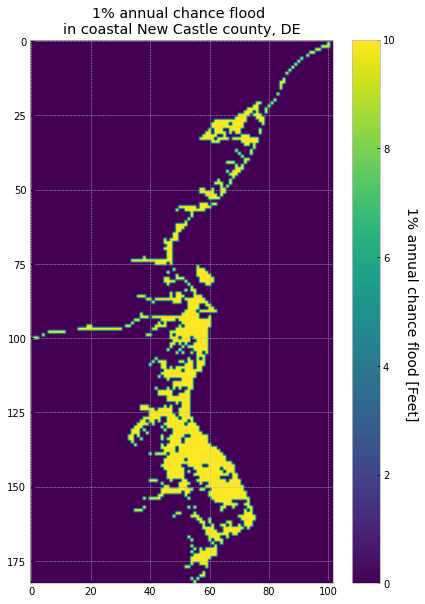

In [2]:
#@Flood depth data

# data: 1% depth / DE / coastal area / New Castle (10003C)
fname3C_Cst_Dpth01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_10003C_Coastal_GeoTIFFS_20140516/10003C_Coastal_CstDpth01pct.tif"
# read in a raster data
rast3C_Cst_Dpth01pct = gdal.Open(fname3C_Cst_Dpth01pct, GA_ReadOnly)
# extract raster to array
samp=100
arr3C_Cst_Dpth01pct = rast3C_Cst_Dpth01pct.ReadAsArray()[::samp, ::samp]
arr3C_Cst_Dpth01pct = arr3C_Cst_Dpth01pct.clip(0,10)
#arr3C_Cst_Dpth01pct = rast3C_Cst_Dpth01pct.ReadAsArray()

print(arr3C_Cst_Dpth01pct.shape)

#  plot raster : 1% depth / DE / coastal area  
fig_raster, ax = plt.subplots(figsize=(7,10))
im = ax.imshow(arr3C_Cst_Dpth01pct)

ax.imshow(rast3C_Cst_Dpth01pct.ReadAsArray()[::samp, ::samp])
ax.set_title("1% annual chance flood \nin coastal New Castle county, DE")
fig_raster.colorbar(im)
fig_raster.text(0.9, 0.5, "1% annual chance flood [Feet]", va="center", ha="center", rotation=-90, fontsize=14)
plt.show()

**Fig1. Flood Depth Grid** Subtitle is the one percent annual chance flood in coastal area at New Castle County (Unit: Feet). Flood hazard is defined by a relation between depth of flooding and the annual chance of inundation greater than that depth. Depth grid is defined by the percent annual chance floods. This is usually only the 1% annual chance flood.This figure is  based on the raster data from the Federal Emergency Management Agency (FEMA) in 2014, which is the most recent available data in Delaware. 

In [3]:
#@Set Latitude/Longitude

# read in the meta data file as list of strings:
mname3c = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_10003C_Coastal_GeoTIFFS_20140516/10003C_Coastal_CstDpth01pct.tif.xml"
fopen = open(mname3c, "r")
lines = [i for i in fopen]
fopen.close()

# get lat lon meta data
for line in lines:
  if "<westBL Sync=\"TRUE\">" in line:
    westBL = float(line.split("<westBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<eastBL Sync=\"TRUE\">" in line:
    eastBL = float(line.split("<eastBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<northBL Sync=\"TRUE\">" in line:
    northBL = float(line.split("<northBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<southBL Sync=\"TRUE\">" in line:
    southBL = float(line.split("<southBL Sync=\"TRUE\">")[2].split("<")[0])

# get number of rows and cols
nrows3c, ncols3c = arr3C_Cst_Dpth01pct.shape

# create lat and lon arrays
# define upperleft and resolution
ul_r = northBL
ul_c = westBL
dr   = (northBL - southBL) / nrows3c
dc   = (eastBL - westBL) / ncols3c

# generate a grid of row and col indices
cols3c, rows3c = np.meshgrid(np.arange(ncols3c), np.arange(nrows3c))

lat_grid_3c = ul_r - rows3c * dr
lon_grid_3c = ul_c + cols3c * dc

# plt.imshow(lat_grid_3c)
# plt.colorbar()
# plt.hist(np.log10(arr1C_Cst_Dpth01pct[arr1C_Cst_Dpth01pct > 0]))

dep_grid_3c = arr3C_Cst_Dpth01pct
#ax = plt.imshow(dep_grid_3c)
#plt.colorbar()

# plt.hist(dep_grid_3c[dep_grid_3c > -1e38].flatten())

## 3.1.2. Census Block Group shapefile

In [4]:
#@Census Block Group Shapefile
# load the census block group (2016)
cblkgname = "/content/drive/My Drive/flooding/data/censusblock/tl_2016_10_bg/tl_2016_10_bg.shp"
decblkg_2016 = gp.read_file(cblkgname)
decblkg_2016

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,10,003,014705,2,100030147052,Block Group 2,G5030,S,2747580,0,+39.6565693,-075.7179591,"POLYGON ((-75.73365 39.65395, -75.73347 39.653..."
1,10,005,990000,0,100059900000,Block Group 0,G5030,S,0,534627888,+38.8648060,-075.2250098,"POLYGON ((-75.30529 38.94809, -75.30454 38.948..."
2,10,005,051007,1,100050510071,Block Group 1,G5030,S,3777749,1042552,+38.6967796,-075.1040689,"POLYGON ((-75.11929 38.69613, -75.11914 38.697..."
3,10,005,051400,2,100050514002,Block Group 2,G5030,S,21467604,0,+38.4626429,-075.2782798,"POLYGON ((-75.33073 38.45312, -75.33011 38.454..."
4,10,005,051500,3,100050515003,Block Group 3,G5030,S,8337616,0,+38.5427423,-075.2461144,"POLYGON ((-75.27591 38.56353, -75.27587 38.563..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,10,003,014907,3,100030149073,Block Group 3,G5030,S,315556,0,+39.6422492,-075.6601384,"POLYGON ((-75.66419 39.64344, -75.66281 39.644..."
570,10,003,016302,2,100030163022,Block Group 2,G5030,S,1063837,0,+39.6410513,-075.6415809,"POLYGON ((-75.65325 39.63536, -75.65324 39.635..."
571,10,003,016904,2,100030169042,Block Group 2,G5030,S,93018625,7441873,+39.3744719,-075.5757732,"POLYGON ((-75.66163 39.37267, -75.66151 39.372..."
572,10,003,001500,1,100030015001,Block Group 1,G5030,S,198949,23880,+39.7525587,-075.5599421,"POLYGON ((-75.56277 39.75075, -75.56241 39.751..."


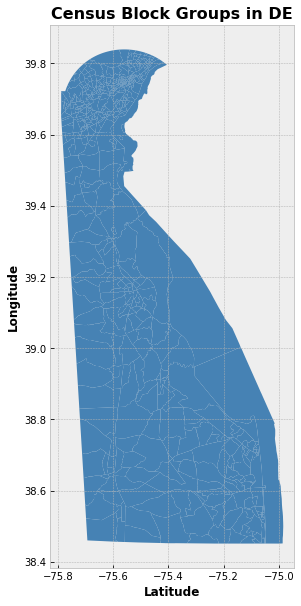

In [5]:
#@Census Block Group in Delaware (Original)
fig_cblockg16, ax = plt.subplots(figsize=(5,10))
decblkg_2016.plot(color="steelblue", ax=ax)
label_plot(ax, "Census Block Groups in DE", "Latitude", "Longitude", axis_size=12, title_size=16)
#fig_cblockg16.savefig("/content/drive/My Drive/flooding/figure/sppa667")

**Fig 2-1. Census Block Groups in Delaware** This figure is based on 2016 shapefile from the United States Census Bureau. 

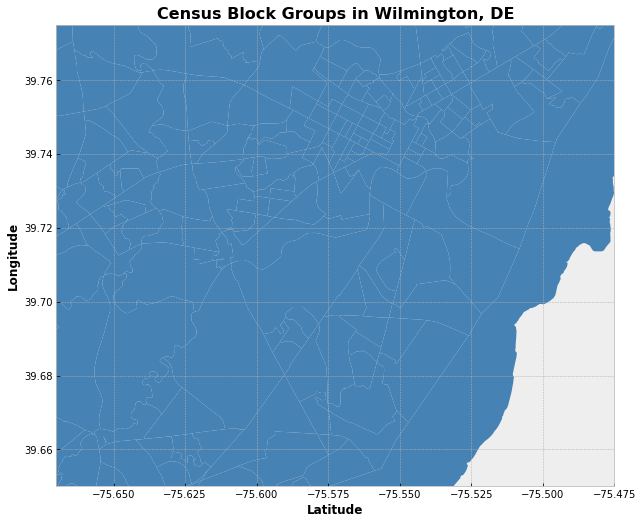

In [6]:
#@Census Block Group in Wilmington (Zoom in)
decblkg_2016_copy = decblkg_2016.copy()

fig_cblockg_wm, ax = plt.subplots(figsize=(10,10))
decblkg_2016_copy.plot(color="steelblue", ax=ax)
ax.set_xlim(-75.67, -75.475)
ax.set_ylim(39.65, 39.775)
label_plot(ax, "Census Block Groups in Wilmington, DE", "Latitude", "Longitude", axis_size=12, title_size=16)
#fig_cblockg_wm.savefig("/content/drive/My Drive/flooding/figure/sppa667")

**Fig 2-2. Census Block Groups in the City of Wilmington, DE**
Subtitle is the census block groups in New Castle County. This figure is based on 2016 shapefile.The original shapefile includes water area, no land area, where they are generally in territorial seas, coastal water, and Great Lakes water areas.

## 3.1.3. Socioeconomic demographic (SED) data 

In [7]:
#@Load socioeconomic demographic (SED) data

# -- lablel plot
def label_plot(plot_axis, title, x_axis_label, y_axis_label, title_weight="bold", title_size=16, axis_weight="bold", axis_size=14 ):
  plot_axis.set_title(title, weight=title_weight, size=title_size)
  plot_axis.set_xlabel(x_axis_label, weight=axis_weight, size=axis_size)
  plot_axis.set_ylabel(y_axis_label, weight=axis_weight, size=axis_size)

# -- Median household income by census block group : New Castle
censusdata.censustable('acs5', 2014, 'B19049')
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2014)
censusdata.geographies(censusdata.censusgeo([('state', '10'), ('county', '*')]), 'acs5', 2014)
income_cblkg = censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', '003'), ('block group', '*')]), ["B19049_001E"])
nc_income_cblkg  = pd.concat([censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', i), ('block group', '*')]), ["B19049_001E"]) for i in ["003"]])
nc_income_cblkg['mincome'] = nc_income_cblkg["B19049_001E"].clip(0,1e9).dropna() 
nc_income_cblkg = nc_income_cblkg[["mincome"]]

# -- Racial factors (White alone / Total) by census block group
censusdata.censustable('acs5', 2014, 'B02001')
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2014)
censusdata.geographies(censusdata.censusgeo([('state', '10'), ('county', '*')]), 'acs5', 2014)
race_cblkg = censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', '003'), ('block group', '*')]), ["B02001_001E", "B02001_002E"])
nc_race_cblkg  = pd.concat([censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', i), ('block group', '*')]), ["B02001_001E", "B02001_002E"]) for i in ["003"]])
nc_race_cblkg['per_white'] = nc_race_cblkg["B02001_002E"] / nc_race_cblkg["B02001_001E"] * 100
nc_race_cblkg['per_nonwhite'] = (nc_race_cblkg["B02001_001E"] - nc_race_cblkg["B02001_002E"])/nc_race_cblkg["B02001_001E"] *100
nc_race_cblkg = nc_race_cblkg[['per_white', 'per_nonwhite']].clip(0,1e9).dropna()
nc_race_cblkg = nc_race_cblkg[["per_nonwhite"]]

# Poverty rate by census block group
censusdata.censustable('acs5', 2014, 'B17010')
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2014)
censusdata.geographies(censusdata.censusgeo([('state', '10'), ('county', '*')]), 'acs5', 2014)
poverty_cblkg = censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', '003'), ('block group', '*')]), ["B17010_001E", "B17010_002E"])
nc_poverty_cblkg  = pd.concat([censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', i), ('block group', '*')]), ["B17010_001E", "B17010_002E"]) for i in ["003"]])
nc_poverty_cblkg['per_below_povlev'] = nc_poverty_cblkg["B17010_002E"] / nc_poverty_cblkg["B17010_001E"] * 100
nc_poverty_cblkg = nc_poverty_cblkg[['per_below_povlev']].clip(0,1e9).dropna()
nc_poverty_cblkg = nc_poverty_cblkg[["per_below_povlev"]]

# (New) Total population by census block group
# Total Population in Occupied Housing units by Tenure (B25008)
censusdata.censustable('acs5', 2014, 'B25008')
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2014)
censusdata.geographies(censusdata.censusgeo([('state', '10'), ('county', '*')]), 'acs5', 2014)
censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', '003'), ('block group', '*')]), ["B25008_001E"])
nc_pop_cblkg  = pd.concat([censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', i), ('block group', '*')]), ["B25008_001E"]) for i in ["003"]])
nc_pop_cblkg['population'] = nc_pop_cblkg["B25008_001E"] 
nc_pop_cblkg = nc_pop_cblkg[["population"]]

# (New) Highschool degree by census block group
# School Enrollment by Level of School for the Population 3 Years and Over','label': 'Not enrolled in school'
censusdata.censustable('acs5', 2014, 'B14007')
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2014)
censusdata.geographies(censusdata.censusgeo([('state', '10'), ('county', '*')]), 'acs5', 2014)
censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', '003'), ('block group', '*')]), ["B14007_019E"])
nc_school_cblkg  = pd.concat([censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', i), ('block group', '*')]), ["B14007_019E"]) for i in ["003"]])
nc_school_cblkg['no_school'] = nc_school_cblkg["B14007_019E"] 
nc_school_cblkg = nc_school_cblkg[["no_school"]]
nc_school_cblkg = nc_school_cblkg[["no_school"]]

# (New) Children by census block group
# Under 18
censusdata.censustable('acs5', 2014, 'B01001')
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2014)
censusdata.geographies(censusdata.censusgeo([('state', '10'), ('county', '*')]), 'acs5', 2014)
censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', '003'), ('block group', '*')]), ["B01001_003E","B01001_004E","B01001_005E","B01001_006E","B01001_027E","B01001_028E","B01001_029E","B01001_030E"])
nc_child_cblkg  = pd.concat([censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', i), ('block group', '*')]), ["B01001_003E","B01001_004E","B01001_005E","B01001_006E","B01001_027E","B01001_028E","B01001_029E","B01001_030E"]) for i in ["003"]])
nc_child_cblkg['under18'] = nc_child_cblkg["B01001_003E"]+nc_child_cblkg["B01001_004E"]+nc_child_cblkg["B01001_005E"]+nc_child_cblkg["B01001_006E"]+nc_child_cblkg["B01001_028E"]+nc_child_cblkg["B01001_028E"]+nc_child_cblkg["B01001_029E"]+nc_child_cblkg["B01001_030E"]       
nc_child_cblkg = nc_child_cblkg[["under18"]]
nc_child_cblkg = nc_child_cblkg[["under18"]]

# (New) Seniors by census block group
# Over65
censusdata.censustable('acs5', 2014, 'B01001')
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2014)
censusdata.geographies(censusdata.censusgeo([('state', '10'), ('county', '*')]), 'acs5', 2014)
censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', '003'), ('block group', '*')]), ["B01001_020E","B01001_021E","B01001_022E","B01001_023E","B01001_024E","B01001_025E",
                                                                                                                     "B01001_044E","B01001_045E","B01001_046E","B01001_047E","B01001_048E","B01001_049E"])
nc_senior_cblkg  = pd.concat([censusdata.download('acs5', 2014, censusdata.censusgeo([('state', '10'), ('county', i), ('block group', '*')]), ["B01001_020E","B01001_021E","B01001_022E","B01001_023E","B01001_024E","B01001_025E","B01001_044E","B01001_045E","B01001_046E","B01001_047E","B01001_048E","B01001_049E"]) for i in ["003"]])
nc_senior_cblkg['over65'] = nc_senior_cblkg["B01001_020E"]+nc_senior_cblkg["B01001_021E"]+nc_senior_cblkg["B01001_022E"]+nc_senior_cblkg["B01001_023E"]+nc_senior_cblkg["B01001_024E"]+nc_senior_cblkg["B01001_025E"]+nc_senior_cblkg["B01001_044E"]+nc_senior_cblkg["B01001_045E"]+nc_senior_cblkg["B01001_046E"]+nc_senior_cblkg["B01001_047E"]+nc_senior_cblkg["B01001_048E"]+nc_senior_cblkg["B01001_049E"] 
nc_senior_cblkg = nc_senior_cblkg[["over65"]]
nc_senior_cblkg = nc_senior_cblkg[["over65"]]

In [8]:
#@Initialize GEOID container

# Income Data : New Castle
geoids = []
# -- for each censusgeo, extract the Block Group GEOID (as type str)
for cgeo in nc_income_cblkg.index:
  geoids.append(cgeo.geo[0][1] + cgeo.geo[1][1] + cgeo.geo[2][1] + cgeo.geo[3][1])
# -- set GEOID column in income DataFrame
nc_income_cblkg["cblockgid"] = geoids

# Race Data : New Castle
geoids = []
# -- for each censusgeo, extract the Block Group GEOID (as type str)
for cgeo in nc_race_cblkg.index:
  geoids.append(cgeo.geo[0][1] + cgeo.geo[1][1] + cgeo.geo[2][1] + cgeo.geo[3][1])
# -- set GEOID column in income DataFrame
nc_race_cblkg["cblockgid"] = geoids

# Poverty Data : New Castle
geoids = []
# -- for each censusgeo, extract the Block Group GEOID (as type str)
for cgeo in nc_poverty_cblkg.index:
  geoids.append(cgeo.geo[0][1] + cgeo.geo[1][1] + cgeo.geo[2][1] + cgeo.geo[3][1])
# -- set GEOID column in income DataFrame
nc_poverty_cblkg["cblockgid"] = geoids

# Population Data : New Castle
geoids = []
# -- for each censusgeo, extract the Block Group GEOID (as type str)
for cgeo in nc_pop_cblkg.index:
  geoids.append(cgeo.geo[0][1] + cgeo.geo[1][1] + cgeo.geo[2][1] + cgeo.geo[3][1])
# -- set GEOID column in income DataFrame
nc_pop_cblkg["cblockgid"] = geoids

# Not enrolled in school Data : New Castle
geoids = []
# -- for each censusgeo, extract the Block Group GEOID (as type str)
for cgeo in nc_school_cblkg.index:
  geoids.append(cgeo.geo[0][1] + cgeo.geo[1][1] + cgeo.geo[2][1] + cgeo.geo[3][1])
# -- set GEOID column in income DataFrame
nc_school_cblkg["cblockgid"] = geoids

# Children Data : New Castle
geoids = []
# -- for each censusgeo, extract the Block Group GEOID (as type str)
for cgeo in nc_child_cblkg.index:
  geoids.append(cgeo.geo[0][1] + cgeo.geo[1][1] + cgeo.geo[2][1] + cgeo.geo[3][1])
# -- set GEOID column in income DataFrame
nc_child_cblkg["cblockgid"] = geoids

# Senior Data : New Castle
geoids = []
# -- for each censusgeo, extract the Block Group GEOID (as type str)
for cgeo in nc_senior_cblkg.index:
  geoids.append(cgeo.geo[0][1] + cgeo.geo[1][1] + cgeo.geo[2][1] + cgeo.geo[3][1])
# -- set GEOID column in income DataFrame
nc_senior_cblkg["cblockgid"] = geoids

#Check the number
cgeo.geo

(('state', '10'), ('county', '003'), ('tract', '012900'), ('block group', '3'))

In [9]:
#@Merge with census tract geodataframe
nc_demo = nc_income_cblkg.merge(nc_race_cblkg, how="outer", left_on="cblockgid", right_on="cblockgid").merge(nc_poverty_cblkg, how="outer", left_on="cblockgid", right_on="cblockgid").merge(nc_pop_cblkg, how="outer", left_on="cblockgid", right_on="cblockgid").merge(nc_school_cblkg, how="outer", left_on="cblockgid", right_on="cblockgid").merge(nc_child_cblkg, how="outer", left_on="cblockgid", right_on="cblockgid").merge(nc_senior_cblkg, how="outer", left_on="cblockgid", right_on="cblockgid")
nc_demo = nc_demo[["cblockgid", "mincome", "per_nonwhite", "per_below_povlev", "population", "no_school", "under18", "over65"]]
nc_demo

,cblockgid,mincome,per_nonwhite,per_below_povlev,population,no_school,under18,over65
0,100030130001,55769,9.702970,0.000000,1010,756,225,134
1,100030130002,49327,4.767184,5.339806,902,675,108,174
2,100030131001,75313,9.282700,16.923077,711,586,115,57
3,100030131002,61000,9.943182,4.145078,704,538,117,61
4,100030131003,59853,1.121795,0.000000,624,473,126,208
...,...,...,...,...,...,...,...,...
363,100030127004,38393,7.380608,17.322835,691,416,198,86
364,100030127005,42684,39.841270,8.783784,630,486,123,40
365,100030129001,34074,64.350615,31.058824,1871,1152,725,76
366,100030129002,58603,17.596567,5.050505,1398,982,203,202


In [10]:
nc_demo.describe()

,mincome,per_nonwhite,per_below_povlev,population,no_school,under18,over65
count,368.000000,366.000000,365.000000,368.000000,368.000000,368.000000,368.00000
mean,67356.024457,33.694627,9.214050,1437.451087,1026.432065,338.307065,192.55163
std,33026.081728,27.510316,13.249521,905.320121,596.796311,291.806804,142.69507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,45678.750000,11.243796,0.000000,858.750000,626.250000,156.000000,97.75000
50%,61144.000000,24.158250,3.773585,1152.000000,842.500000,256.500000,158.00000
75%,83391.000000,50.777329,12.932790,1835.750000,1263.750000,449.250000,254.25000
max,209250.000000,100.000000,82.666667,6553.000000,4066.000000,2217.000000,1147.00000


# **4. Methodology**

This research conducted data correlation analysis, geospatial analysis between flood risk and socioeconomic and demographic data, and applied machine learning techniques for prediction. As for the machine learning techniques, this research used random forest classifier, logistic regression classification, and random forest regressor, and compared the model accuracy.

##4.1. Data Exploration

1) Data distribution of flood risk and SED data

2) Data correlation 

##4.2. Geospatial Analysis

1) Spatial join flood depth grid and census block group shapefile

2) Merge census block groups shapefile to the SED data

3) Subset New Castle County dataset to Wilmington City dataset

##4.3. Machine Learning Analysis

Firstly, this research conducted the random forest classifier and the logistic regerssion classification and aimed to compare two models together. The classification is the problem of predicting a "discrete" class label output. The classification model structure is built as following: 

* Target (1): Presence or absence of flood risk (Binary)
* Objects: Census block groups
* Features (7):Estimated median income, Percent of population that is not white people, Percent of people below the poverty line, Fraction of people who is not enrolled in school, Estimated total number of children (age under 18), Estimated total number of seniors (age over 65), Water area (where the fraction of the current water area is over 0.05)

However, the result of the classification models shows 100% model accuracy. It means the target variable is too easy to be predicted. Therefore, this research also conducted the regression model, which is used for the problem of predicting a "continuous" quantity output. The regressor model structure is built as following:

* Target: 1% annual chance flood risk (multilevel)
* Objects: Census block groups
* Features:Estimated median income, Percent of population that is not white people, Percent of people below the poverty line, Fraction of people who is not enrolled in school, Estimated total number of children (age under 18), Estimated total number of seniors (age over 65), Water area (where the fraction of the current water area is over 0.05)

As a restult, the random forest classifier and the logistic regression classification show too high model accuracy, while the random forest regressor shows too low model accuracy. To imporve the model accuracy, the model can be checked and solved by followings ways [(Sunil Ray, 2015)]("https://www.analyticsvidhya.com/blog/2015/12/improve-machine-learning-results/"):

1. add more data
2. treat missing and outlier values
3. **feature engineering** 
4. feature selection
5. **multiple algorithms**
6. **algorithm tuning**
7. ensemble methods (bagging and boosting)
8. cross validation





1) Random Forest Classifier
* Target: Presence or absence of flood risk (Binary)
* Objects: Census block groups
* Features:Estimated median income, Percent of population that is not white people, Percent of people below the poverty line, Fraction of people who is not enrolled in school, Estimated total number of children (age under 18), Estimated total number of seniors (age over 65), Water area (where the fraction of the current water area is over 0.05)

2) Logistic Regression
* Target: Presence or absence of flood risk (Binary)
* Objects: Census block groups
* Features:Estimated median income, Percent of population that is not white people, Percent of people below the poverty line, Fraction of people who is not enrolled in school, Estimated total number of children (age under 18), Estimated total number of seniors (age over 65), Water area (where the fraction of the current water area is over 0.05)

3) Random Forest Regressor
* Target: 1% annual chance flood risk (multilevel)
* Objects: Census block groups
* Features:Estimated median income, Percent of population that is not white people, Percent of people below the poverty line, Fraction of people who is not enrolled in school, Estimated total number of children (age under 18), Estimated total number of seniors (age over 65), Water area (where the fraction of the current water area is over 0.05)


#**5. Analysis Results**

## (cf) Data Preprocessing

Geocoding: Raster data to Census block group shapefile, Shapefile to SES data

Text(0.9, 0.5, 'Clipped 1% annual chance flood [Feet]')

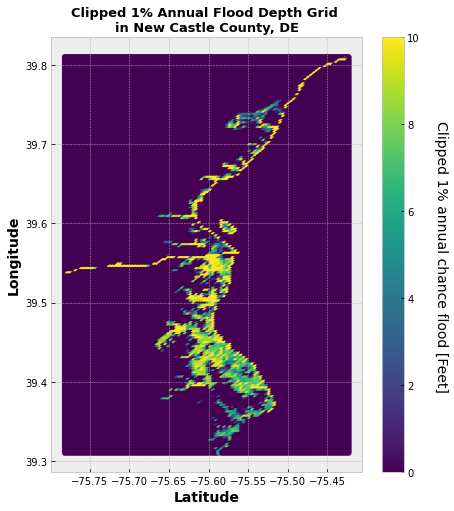

In [11]:
#@Raster data preprocessing 

df_dgrid_3c = pd.DataFrame(columns=["lat", "lon", "dep"])
#dep_grid_3c = arr3C_Cst_Dpth01pct
df_dgrid_3c["lat"] = lat_grid_3c.flatten()
df_dgrid_3c["lon"] = lon_grid_3c.flatten()
df_dgrid_3c["dep"] = dep_grid_3c.flatten().astype(float)
def make_point(x):
  return Point(x["lon"], x["lat"])
  make_point(df_dgrid.iloc[0])
df_dgrid_3c["geometry"] = df_dgrid_3c.apply(make_point, axis=1)
df_dgrid = df_dgrid_3c
df_dgrid

df_dgrid_3c = gp.GeoDataFrame(df_dgrid_3c)
df_dgrid = gp.GeoDataFrame(df_dgrid)

#Figure
fig_df_dgrid, ax = plt.subplots(figsize=(7,8))
df_dgrid.plot("dep", ax=ax, legend=True)
label_plot(ax, "Clipped 1% Annual Flood Depth Grid \nin New Castle County, DE", "Latitude", "Longitude", axis_size=14, title_size=13)
fig_df_dgrid.text(0.9, 0.5, "Clipped 1% annual chance flood [Feet]", va="center", ha="center", rotation=-90, fontsize=14)
#fig_df_dgrid.savefig("/content/drive/My Drive/flooding/figure/sppa667")

**Fig 3-1. Clipped 1% Annual Flood Depth Grid in New Castle County, Delaware (Unit:Feet)** The data is based on the 2014 raster data from the FEMA. The figure above shows the 1% annual flood depth grid clipped from 0 to 1. The figure shows that the local area surrounded by the Delaware River has the flood risk. 

Text(0.85, 0.5, '1% annual chance flood [Feet]')

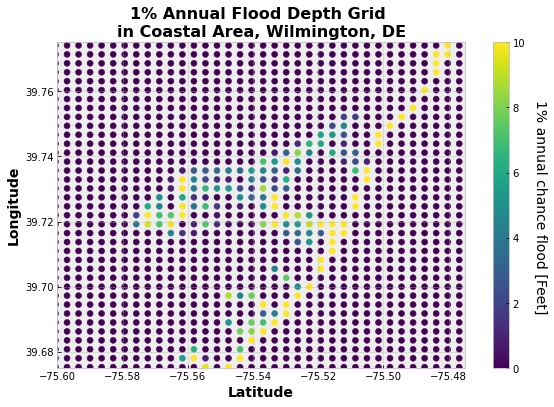

In [12]:
#@Raster data in Wilmington (Zoom in)
df_dgrid_copy = df_dgrid.copy()

fig_df_dgrid_wm, ax = plt.subplots(figsize=(10,6))
df_dgrid_copy.plot("dep", ax=ax, legend=True)
ax.set_xlim(-75.6, -75.475)
ax.set_ylim(39.675, 39.775)
label_plot(ax, "1% Annual Flood Depth Grid \nin Coastal Area, Wilmington, DE", "Latitude", "Longitude", axis_size=14, title_size=16)
fig_df_dgrid_wm.text(0.85, 0.5, "1% annual chance flood [Feet]", va="center", ha="center", rotation=-90, fontsize=14)
#fig_df_dgrid_wm.savefig("/content/drive/My Drive/flooding/figure/sppa667")

**Fig 3-2. 1% Annual Flood Depth Grid in Coastal Area, Wilmington, Delaware (Unit:Feet)** The data is based on the 2014 raster data from the FEMA. The figure above shows the 1% annual flood depth grid clipped from 0 to 10. The figure shows that the local area surrounded by the Delaware River has the flood risk. 


In [13]:
#@Perform a spatial join between the Raster data and Census block shape file
df_dgrid_3c_decblkg_2016 = gp.sjoin(df_dgrid_3c, decblkg_2016)
df_dgrid_decblkg_2016 = df_dgrid_3c_decblkg_2016

df_dgrid_3c_decblkg_2016["dep_cl"] = df_dgrid_3c_decblkg_2016["dep"].clip(0, 1e6)
df_dgrid_g = df_dgrid_3c_decblkg_2016.groupby("GEOID").mean().reset_index() # ---get the average number of depth
df_dgrid_sub = df_dgrid_3c_decblkg_2016[["GEOID", "lat", "lon", "dep", "dep_cl"]]
df_dgrid_sub.columns
# Merge 
decblkg_2016_df_dgrid_sub = decblkg_2016.merge(df_dgrid_sub, on="GEOID")
decblkg_2016_df_dgrid_sub
decblkg_2016_df_dgrid_sub_cols = decblkg_2016_df_dgrid_sub[["GEOID", "lat", "lon", "dep", "dep_cl", "geometry", "AWATER", "ALAND"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4269

  


In [14]:
#@Clean up water area (Add new feature)
data16 = decblkg_2016_df_dgrid_sub_cols
# Calculate the fraction of the water area (to add new feature)
data16["water_frac"] = data16.AWATER / (data16.ALAND + data16.AWATER) 
# Calculate the water area (to add new feature)
threshold = 0.05
data16["has_water"] = data16.water_frac > threshold
# Subset the land area over 0 (to exclude the water basin area in maps)
(data16.ALAND > 0).sum() # Not entirely water
data16 = data16[data16.ALAND >0]
data16
data16.describe()

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,lat,lon,dep,dep_cl,AWATER,ALAND,water_frac
count,12205.000000,12205.000000,12205.000000,12205.000000,1.220500e+04,1.220500e+04,12205.000000
mean,39.561405,-75.647474,0.817141,0.817141,2.356874e+06,2.696875e+07,0.050282
std,0.152822,0.077125,2.454951,2.454951,5.746193e+06,3.414420e+07,0.084185
min,39.310938,-75.780931,0.000000,0.000000,0.000000e+00,5.850600e+04,0.000000
25%,39.420537,-75.710197,0.000000,0.000000,0.000000e+00,3.148834e+06,0.000000
50%,39.563016,-75.650074,0.000000,0.000000,1.289360e+05,1.704389e+07,0.007332
75%,39.700016,-75.589950,0.000000,0.000000,2.179773e+06,3.504986e+07,0.074078
max,39.809615,-75.423726,10.000000,10.000000,3.526101e+07,1.703789e+08,0.514392


In [15]:
#@ Merge geodata to SED factors data
data16_nc_demo = data16.merge(nc_demo, left_on="GEOID", right_on="cblockgid",how="left")
nc_data = data16_nc_demo
nc_data["no_school_frac"] = nc_data.no_school / nc_data.population
cols = ["cblockgid", "geometry", "lat", "lon",
        "dep", "dep_cl", 
        "mincome", "per_nonwhite", "per_below_povlev", "population", "no_school","no_school_frac", "under18", "over65", "has_water"]
nc_data_sub = nc_data[cols]
nc_data_sub.columns = ["cblockgid", "geometry", "lat", "lon", "dep", "dep_cl",  
                       "mincome", "per_nonwhite", "per_below_povlev", "population", "no_school", "no_school_frac", "under18", "over65", "has_water"]
nc_data_sub = nc_data_sub.dropna()
nc_data_sub

,cblockgid,geometry,lat,lon,dep,dep_cl,mincome,per_nonwhite,per_below_povlev,population,no_school,no_school_frac,under18,over65,has_water
0,100030147052,"POLYGON ((-75.73365 39.65395, -75.73347 39.653...",39.664396,-75.720807,0.0,0.0,76142.0,20.987654,2.682927,1458.0,1056.0,0.724280,310.0,214.0,False
1,100030147052,"POLYGON ((-75.73365 39.65395, -75.73347 39.653...",39.661656,-75.724344,0.0,0.0,76142.0,20.987654,2.682927,1458.0,1056.0,0.724280,310.0,214.0,False
2,100030147052,"POLYGON ((-75.73365 39.65395, -75.73347 39.653...",39.661656,-75.720807,0.0,0.0,76142.0,20.987654,2.682927,1458.0,1056.0,0.724280,310.0,214.0,False
3,100030147052,"POLYGON ((-75.73365 39.65395, -75.73347 39.653...",39.661656,-75.717271,0.0,0.0,76142.0,20.987654,2.682927,1458.0,1056.0,0.724280,310.0,214.0,False
4,100030147052,"POLYGON ((-75.73365 39.65395, -75.73347 39.653...",39.661656,-75.713734,0.0,0.0,76142.0,20.987654,2.682927,1458.0,1056.0,0.724280,310.0,214.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,100030169042,"POLYGON ((-75.66163 39.37267, -75.66151 39.372...",39.310938,-75.586413,5.8,5.8,51701.0,1.851852,3.333333,1233.0,963.0,0.781022,217.0,226.0,True
12201,100030169042,"POLYGON ((-75.66163 39.37267, -75.66151 39.372...",39.310938,-75.582877,0.0,0.0,51701.0,1.851852,3.333333,1233.0,963.0,0.781022,217.0,226.0,True
12202,100030015001,"POLYGON ((-75.56277 39.75075, -75.56241 39.751...",39.752075,-75.561656,0.0,0.0,18634.0,18.888889,0.000000,810.0,679.0,0.838272,99.0,337.0,True
12203,100030015001,"POLYGON ((-75.56277 39.75075, -75.56241 39.751...",39.752075,-75.558120,0.0,0.0,18634.0,18.888889,0.000000,810.0,679.0,0.838272,99.0,337.0,True


In [16]:
#@Subset census block groups of the Wilimington City
#Based on the website: http://www.usa.com/wilmington-de.htm

# New Castle couty
nc_data_sub_copy = nc_data_sub.copy()
len(nc_data_sub_copy)

# Wilmington 
cblockgid_wil = nc_data_sub_copy["cblockgid"].str.contains('100030002001|100030002002|100030002003|100030002004|100030002005|100030002006|100030003001|100030003002|100030003003|100030003004|100030004001|100030004002|100030004003|100030005001|100030005002|100030005003|100030005004|100030006011|100030006012|100030006013|100030006011|100030006021|100030006022|100030006023|1000300030021|1000300030022|1000300030023|100039801001|100030013001|100030013002|100030013003|100030013004|100030012001|100030012002|100030011001|100030011001|100030011002|100030011003|100030014001|100030014002|100030016001|100030016002|100030016003|100030024001|100030024002|100030024003|100030024004|100030025001|100030025002|100030025003|100030023001|100030023002|100030023003|100030022001|100030022002|100030022003|100030026001|100030026002|100030026003|100030026004|100030026001|100030027001|100030027002|100030026001|100030021001|100030021002|100030027001|100030028001|100030028002|100030029001|100030029002|100030029003|100030029004|100039801001|100030019022|100030009001|100030009002|100030009003|100030009004|100030015001|100030015002|100030023001')
nc_data_sub_wil = nc_data_sub_copy[cblockgid_wil]
nc_data_sub_wil 
len(nc_data_sub_wil)

# Add new features in Wilmington dataset
nc_data_sub_wil["no_school_frac"] = nc_data_sub_wil.no_school / nc_data_sub_wil.population
nc_data_sub_wil["has_water_int"] = nc_data_sub_wil.has_water * 1
nc_data_sub_wil.columns

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


Index(['cblockgid', 'geometry', 'lat', 'lon', 'dep', 'dep_cl', 'mincome',
       'per_nonwhite', 'per_below_povlev', 'population', 'no_school',
       'no_school_frac', 'under18', 'over65', 'has_water', 'has_water_int'],
      dtype='object')

In [17]:
# Log10

log_dep = []
dep = nc_data_sub_wil["dep"]
for i in dep:
  if i <= 0.0:
    log_dep.append(0.0)
  else:
    log_dep.append(np.log10(i))
nc_data_sub_wil["log_dep"] = log_dep

nc_data_sub_wil["log_dep"] = nc_data_sub_wil["log_dep"].clip(0, 1e6)

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


## 5.1. Data Exploration Result

Regarding to the data distribution, the flood risk zone in Wilmington city is calculated by census block groups. The 1% annual chance flood is multilevel data set, while the water area is binary dataset. The SED data is estimated from 2014 to 2018 and the data source is from the U.S. Census Bureau. Based on the census block groups, the mean of the median household income is $55,261, the percentage of not white people is 57.24%, and the rate of the total percentage of people under poverty line is 18.45%. The mean of the fraction of people not enrolled in school is 0.76 (75.65%), the total estimate number of children (age under 18) is 201, and the total estimate number of seniors (age over 65) is 135.

As a result of the correlation analysis, the correlation between the 1% annual chance flood risk and percentage of people not white, and the percentage of the people below poverty line are highly correlated.


In [18]:
# data summary
nc_data_sub_wil.describe()

,lat,lon,dep,dep_cl,mincome,per_nonwhite,per_below_povlev,population,no_school,no_school_frac,under18,over65,has_water_int,log_dep
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,39.750172,-75.553137,0.516256,0.516256,55261.177340,57.237379,18.446325,967.147783,727.669951,0.756534,200.970443,135.093596,0.285714,0.066267
std,0.011163,0.016557,1.620714,1.620714,30641.633629,32.408620,17.069917,315.344881,232.317797,0.087995,128.113460,98.604802,0.452871,0.203469
min,39.724676,-75.586413,0.000000,0.000000,10177.000000,3.810976,0.000000,389.000000,280.000000,0.417404,21.000000,12.000000,0.000000,0.000000
25%,39.741115,-75.565193,0.000000,0.000000,32206.000000,20.620621,2.692308,719.500000,576.000000,0.701105,99.000000,64.000000,0.000000,0.000000
50%,39.752075,-75.554583,0.000000,0.000000,47976.000000,66.979362,16.071429,962.000000,745.000000,0.762509,187.000000,108.000000,0.000000,0.000000
75%,39.760295,-75.540436,0.000000,0.000000,69403.500000,88.115942,28.991597,1141.000000,876.000000,0.793226,261.000000,178.000000,1.000000,0.000000
max,39.771255,-75.519216,10.000000,10.000000,162143.000000,100.000000,77.600000,1792.000000,1179.000000,1.022071,673.000000,390.000000,1.000000,1.000000


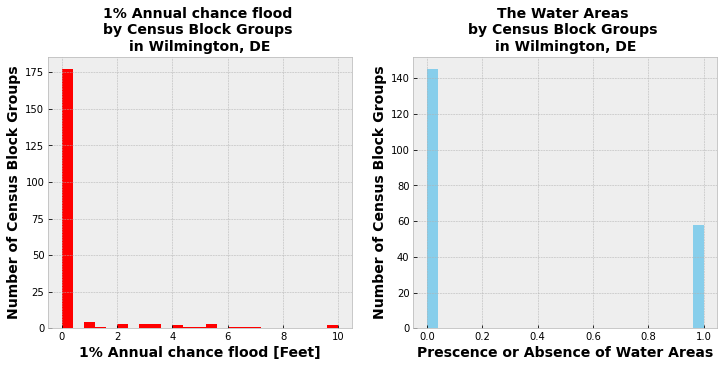

In [19]:
#@Flood risk and water areas plots
fig_nc_data_sub_wil, ax=plt.subplots(nrows=1, ncols=2, figsize=[12, 5])
plot1 = ax[0]
plot2 = ax[1]

nc_data_sub_wil.hist('dep', ax=plot1, bins=25, color="red")
label_plot(plot1, "1% Annual chance flood \nby Census Block Groups \nin Wilmington, DE", "1% Annual chance flood [Feet]", "Number of Census Block Groups", axis_size=14, title_size=14)

nc_data_sub_wil.hist('has_water_int', ax=plot2, bins=25, color="skyblue")
label_plot(plot2, "The Water Areas \nby Census Block Groups \nin Wilmington, DE", "Prescence or Absence of Water Areas", "Number of Census Block Groups", axis_size=14, title_size=14)

fig_nc_data_sub_wil.subplots_adjust(wspace=.2, hspace=.5)
fig_nc_data_sub_wil.show()

**Fig 4-1. The Flood Depth & Water Areas** The flood risk status by census block groups in Wilmington, DE. The 1% annual chance flood is multilevel data set, while the water area is binary dataset.



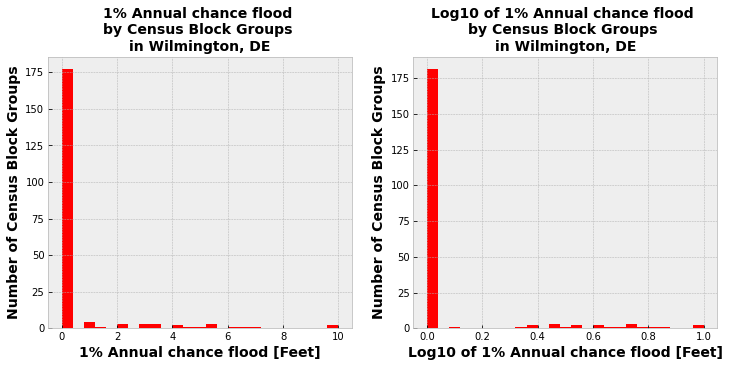

In [20]:
#@Flood risk and water areas plots
fig_nc_data_sub_wil, ax=plt.subplots(nrows=1, ncols=2, figsize=[12, 5])
plot1 = ax[0]
plot2 = ax[1]

nc_data_sub_wil.hist('dep', ax=plot1, bins=25, color="red")
label_plot(plot1, "1% Annual chance flood \nby Census Block Groups \nin Wilmington, DE", "1% Annual chance flood [Feet]", "Number of Census Block Groups", axis_size=14, title_size=14)

nc_data_sub_wil.hist('log_dep', ax=plot2, bins=25, color="red")
label_plot(plot2, "Log10 of 1% Annual chance flood \nby Census Block Groups \nin Wilmington, DE", "Log10 of 1% Annual chance flood [Feet]", "Number of Census Block Groups", axis_size=14, title_size=14)

fig_nc_data_sub_wil.subplots_adjust(wspace=.2, hspace=.5)
fig_nc_data_sub_wil.show()

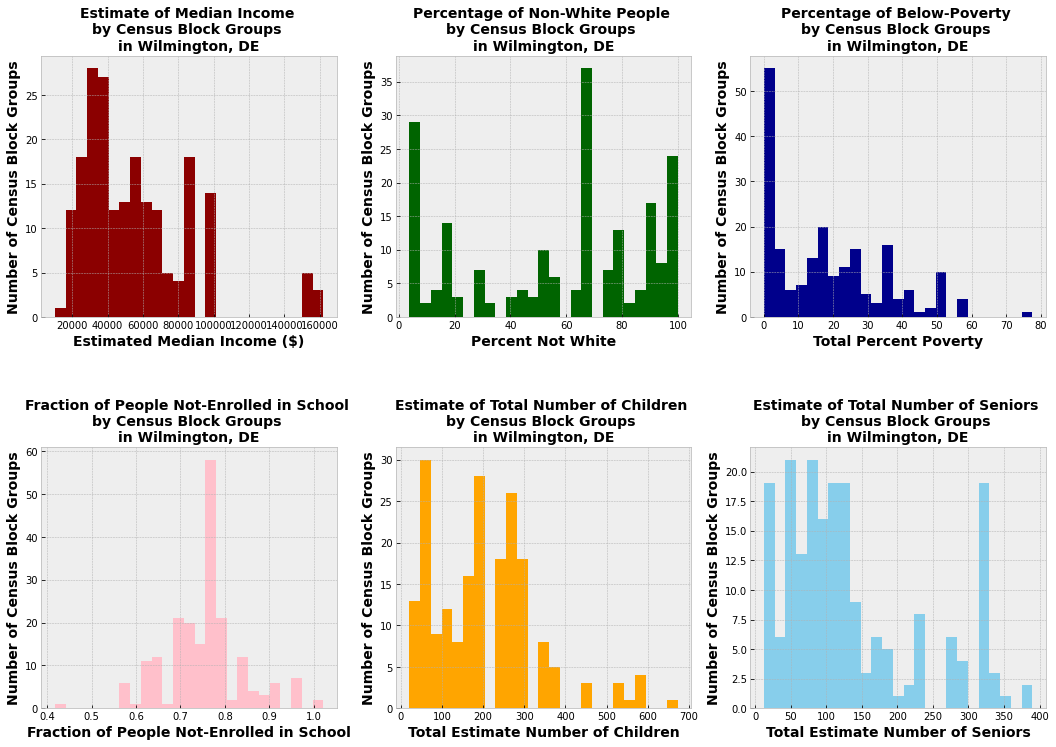

In [21]:
#@ SED data plot
fig_nc_data_sub_wil, ax=plt.subplots(nrows=2, ncols=3, figsize=[18, 12])
plot1 = ax[0,0]
plot2 = ax[0,1]
plot3 = ax[0,2]
plot4 = ax[1,0]
plot5 = ax[1,1]
plot6 = ax[1,2]

nc_data_sub_wil.hist('mincome', ax=plot1, bins=25, color="darkred")
label_plot(plot1, "Estimate of Median Income \nby Census Block Groups \nin Wilmington, DE", "Estimated Median Income ($)", "Number of Census Block Groups", axis_size=14, title_size=14)

nc_data_sub_wil.hist('per_nonwhite', ax=plot2, bins=25, color="darkgreen")
label_plot(plot2, "Percentage of Non-White People \nby Census Block Groups \nin Wilmington, DE", "Percent Not White", "Number of Census Block Groups", axis_size=14, title_size=14)

nc_data_sub_wil.hist('per_below_povlev', ax=plot3, bins=25, color="darkblue")
label_plot(plot3, "Percentage of Below-Poverty \nby Census Block Groups \nin Wilmington, DE", "Total Percent Poverty", "Number of Census Block Groups", axis_size=14, title_size=14)

nc_data_sub_wil.hist('no_school_frac', ax=plot4, bins=25, color="pink")
label_plot(plot4, "Fraction of People Not-Enrolled in School \nby Census Block Groups \nin Wilmington, DE", "Fraction of People Not-Enrolled in School", "Number of Census Block Groups", axis_size=14, title_size=14)

nc_data_sub_wil.hist('under18', ax=plot5, bins=25, color="orange")
label_plot(plot5, "Estimate of Total Number of Children \nby Census Block Groups \nin Wilmington, DE", "Total Estimate Number of Children", "Number of Census Block Groups", axis_size=14, title_size=14)

nc_data_sub_wil.hist("over65", ax=plot6, bins=25, color="skyblue")
label_plot(plot6, "Estimate of Total Number of Seniors \nby Census Block Groups \nin Wilmington, DE", "Total Estimate Number of Seniors", "Number of Census Block Groups", axis_size=14, title_size=14)


fig_nc_data_sub_wil.subplots_adjust(wspace=.2, hspace=.5)
fig_nc_data_sub_wil.show()

**Fig 4-2. The socioeconomic demographic status in Wilmington, DE** The data is estimated from 2014 to 2018 and the data source is from the U.S. Census Bureau. Based on the census block groups, the mean of the median household income is $55,261, the percentage of not white people is 57.24%, and the rate of the total percentage of people under poverty line is 18.45%. The mean of the fraction of people not enrolled in school is 0.76 (75.65%), the total estimate number of children (age under 18) is 201, and the total estimate number of seniors (age over 65) is 135.


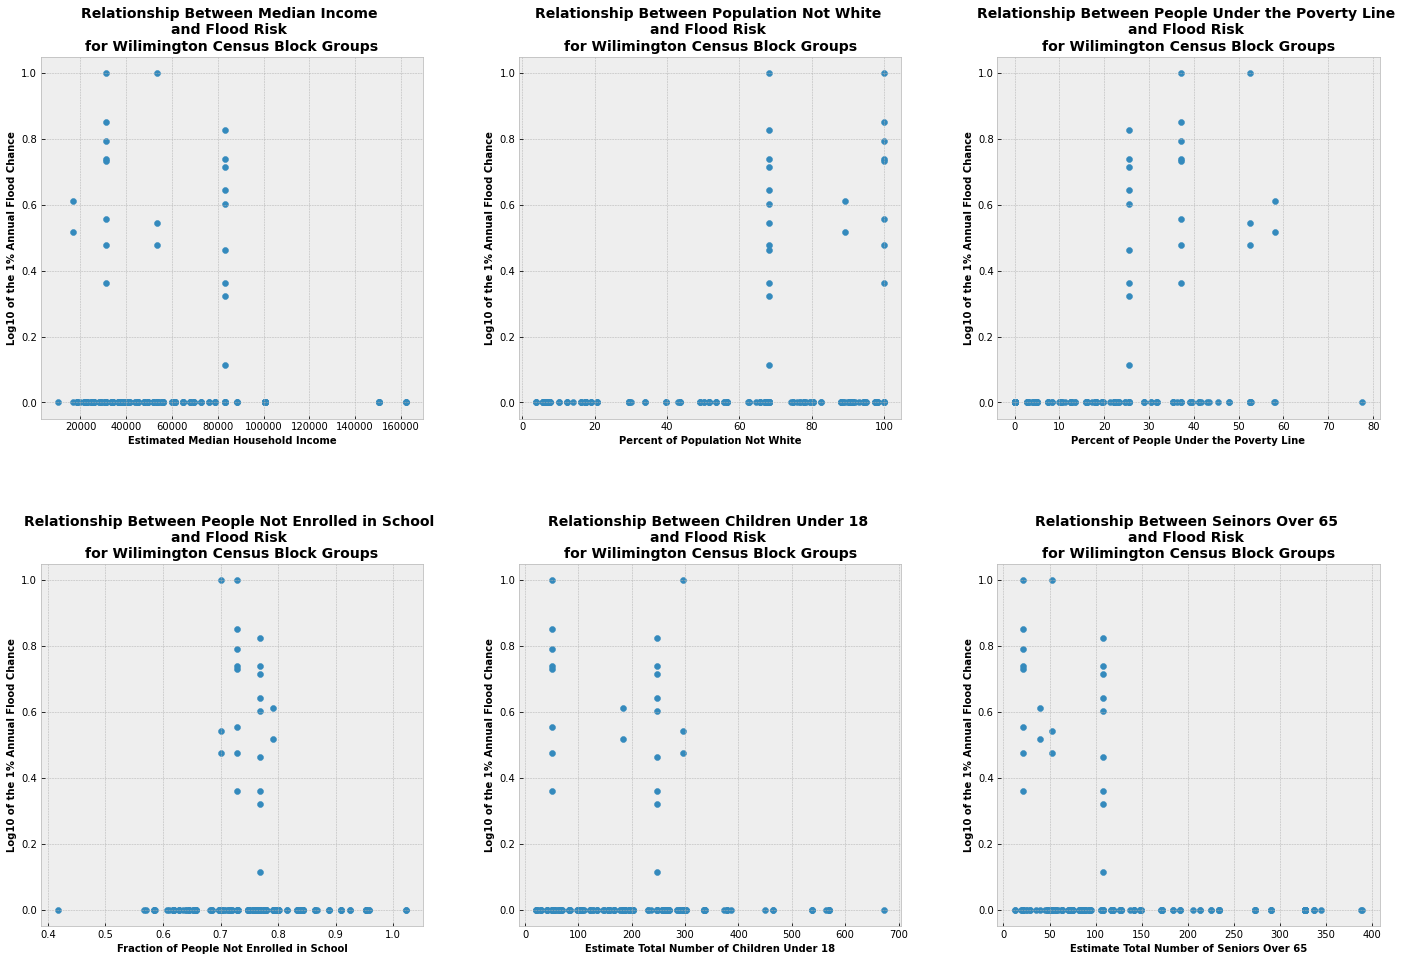

In [22]:
#@distribution
fig_nc_data_sub_wil, ax = plt.subplots(nrows=2, ncols=3, figsize=[24, 16])
plot0 = ax[0,0]
plot1 = ax[0,1]
plot2 = ax[0,2]
plot3 = ax[1,0]
plot4 = ax[1,1]
plot5 = ax[1,2]

#plot 0
plot0.scatter(nc_data_sub_wil["mincome"], nc_data_sub_wil["log_dep"])
label_plot(plot0, "Relationship Between Median Income \nand Flood Risk \nfor Wilimington Census Block Groups", "Estimated Median Household Income", "Log10 of the 1% Annual Flood Chance", title_size=14, axis_size=10)
#plot 1
plot1.scatter(nc_data_sub_wil["per_nonwhite"], nc_data_sub_wil["log_dep"])
label_plot(plot1, "Relationship Between Population Not White \nand Flood Risk \nfor Wilimington Census Block Groups", "Percent of Population Not White", "Log10 of the 1% Annual Flood Chance", title_size=14, axis_size=10)
#plot 2
plot2.scatter(nc_data_sub_wil["per_below_povlev"], nc_data_sub_wil["log_dep"])
label_plot(plot2, "Relationship Between People Under the Poverty Line \nand Flood Risk \nfor Wilimington Census Block Groups", "Percent of People Under the Poverty Line", "Log10 of the 1% Annual Flood Chance", title_size=14, axis_size=10)
#plot 3
plot3.scatter(nc_data_sub_wil["no_school_frac"], nc_data_sub_wil["log_dep"])
label_plot(plot3, "Relationship Between People Not Enrolled in School \nand Flood Risk \nfor Wilimington Census Block Groups", "Fraction of People Not Enrolled in School", "Log10 of the 1% Annual Flood Chance", title_size=14, axis_size=10)
#plot 4
plot4.scatter(nc_data_sub_wil["under18"], nc_data_sub_wil["log_dep"])
label_plot(plot4, "Relationship Between Children Under 18 \nand Flood Risk \nfor Wilimington Census Block Groups", "Estimate Total Number of Children Under 18", "Log10 of the 1% Annual Flood Chance", title_size=14, axis_size=10)
#plot 5
plot5.scatter(nc_data_sub_wil["over65"], nc_data_sub_wil["log_dep"])
label_plot(plot5, "Relationship Between Seinors Over 65 \nand Flood Risk \nfor Wilimington Census Block Groups", "Estimate Total Number of Seniors Over 65", "Log10 of the 1% Annual Flood Chance", title_size=14, axis_size=10)

fig_nc_data_sub_wil.subplots_adjust(wspace=.25, hspace=.4)
fig_nc_data_sub_wil.show()

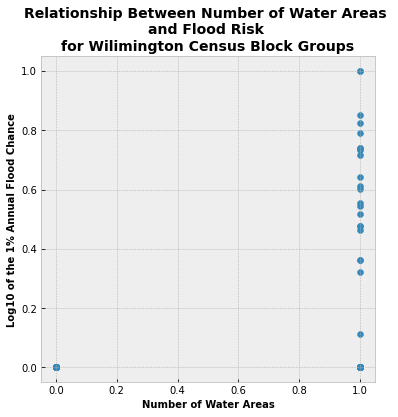

In [23]:
#@distribution
fig_nc_data_sub_wil, ax = plt.subplots(figsize=[6, 6])
plot0 = ax
plot0.scatter(nc_data_sub_wil["has_water_int"], nc_data_sub_wil["log_dep"])
label_plot(plot0, "Relationship Between Number of Water Areas \nand Flood Risk \nfor Wilimington Census Block Groups", "Number of Water Areas", "Log10 of the 1% Annual Flood Chance", title_size=14, axis_size=10)

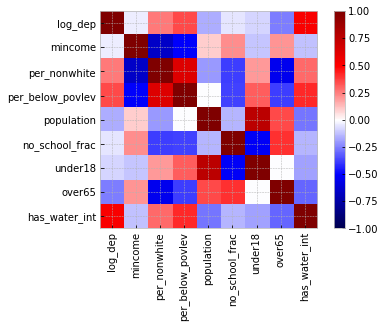

In [24]:
#@Correlation
nc_data_wil2 = nc_data_sub_wil[['log_dep', 'mincome', 'per_nonwhite', 'per_below_povlev', 'population', 'no_school_frac', 'under18', 'over65', "has_water_int"]]
plt.imshow(nc_data_wil2.corr(), clim=(-1,+1), cmap='seismic')
plt.yticks(range(len(nc_data_wil2.corr())), nc_data_wil2.corr().columns)
plt.xticks(range(len(nc_data_wil2.corr())), nc_data_wil2.corr().columns, rotation='vertical')
plt.colorbar()

**Fig 5. Correlation between features** The correlation between the 1% annual chance flood risk and percentage of people not white, and the percentage of the people below poverty line are highly correlated.


## 5.2. Geospatial Analysis Result


The figure of the flood risk depth in Wilmington (See Fig 6-3) shows only three census block groups are exposed to the flood risk. However, the FEMA data I used in this research did not show whether the flood depth is measured in area around the flood risk zone. The issue realted to the data availability is an issue particularly when researching the middle size of the urban city rather than when researching the megacity such as the New York City. 

Based on the geospatial analysis, people living in the low median income household, people not white, and people under poverty line  are living in the flood hazard zone. However, people not enrolled in school, children (people under 18 years old), and seniors (people over 65 years old)  are not highly close to the flood hazard zone in the City of Wilmington, DE.

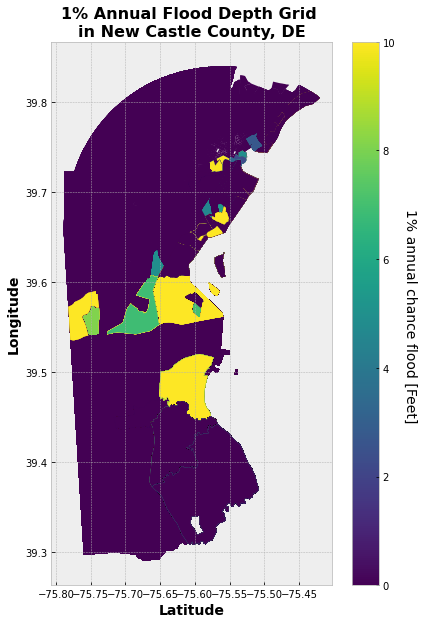

In [25]:
#@Flood risk map in New Castle county
fig_fld, ax = plt.subplots(figsize=(7,10))
nc_data_sub.plot("dep", ax=ax, legend=True)
label_plot(ax, "1% Annual Flood Depth Grid \nin New Castle County, DE", "Latitude", "Longitude", axis_size=14, title_size=16)
fig_fld.text(0.9, 0.5, "1% annual chance flood [Feet]", va="center", ha="center", rotation=-90, fontsize=14)
fig_fld.savefig("/content/drive/My Drive/flooding/figure/sppa667")

**Fig 6-1. The 1% annual flood depth grid in New Castle County, DE** This figure shows the flood depth which exclude the water areas in the census block groups shapefile from the raw dataset. Some coastal areas show high possibility of the flood risk in New Castle County.

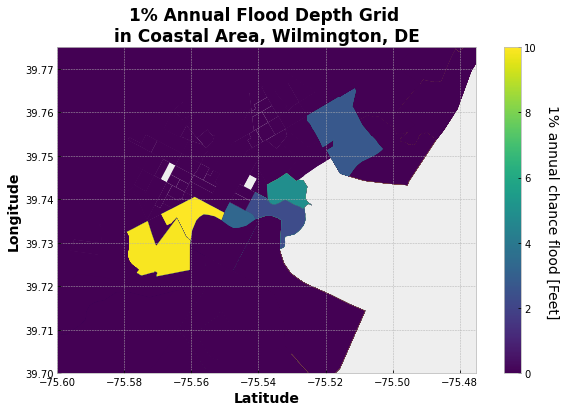

In [26]:
#@Flood risk map in Wilmington
fig, ax = plt.subplots(figsize=(10,6))
nc_data_sub.plot("dep", legend=True, ax=ax)
ax.set_xlim(-75.6, -75.475)
ax.set_ylim(39.7, 39.775)
fig.text(0.85, 0.5, "1% annual chance flood [Feet]", va="center", ha="center", rotation=-90, fontsize=14)
label_plot(ax, "1% Annual Flood Depth Grid \nin Coastal Area, Wilmington, DE", "Latitude", "Longitude", axis_size=14, title_size=17)

**Fig 6-2. The 1% annual flood depth grid in areas around Wilmington, DE** This figure shows the flood depth which exclude the water areas in the census block groups shapefile from the raw dataset. Some coastal areas show high possibility of the flood risk around the City of Wilmington.

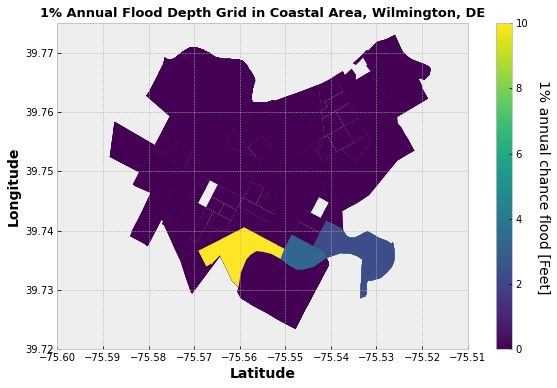

In [27]:
#@Flood risk in Wilmington (Cleaned up)
fig, ax = plt.subplots(figsize=(10,6))
nc_data_sub_wil.plot("dep", legend=True, ax=ax)
ax.set_xlim(-75.60, -75.51)
ax.set_ylim(39.72, 39.775)
fig.text(0.85, 0.5, "1% annual chance flood [Feet]", va="center", ha="center", rotation=-90, fontsize=14)
label_plot(ax, "1% Annual Flood Depth Grid in Coastal Area, Wilmington, DE", "Latitude", "Longitude", axis_size=14, title_size=13)

**Fig 6-3. The 1% annual flood depth grid in Wilmington, DE** This figure shows the flood depth which exclude the water areas in the census block groups shapefile from the raw dataset. Three census block groups show high possibility of the flood risk in the City of Wilmington. However, there is limitation of the data interpretation since it is not known whether the flood risk in the areas around the flood risk zone is measured by the FEMA or not. 

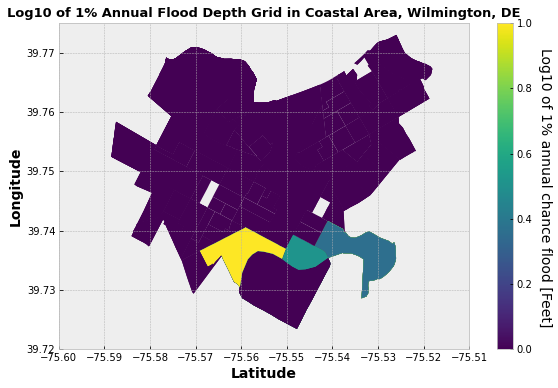

In [28]:
#@Flood risk in Wilmington (Cleaned up)
fig, ax = plt.subplots(figsize=(10,6))
nc_data_sub_wil.plot("log_dep", legend=True, ax=ax)
ax.set_xlim(-75.60, -75.51)
ax.set_ylim(39.72, 39.775)
fig.text(0.85, 0.5, "Log10 of 1% annual chance flood [Feet]", va="center", ha="center", rotation=-90, fontsize=14)
label_plot(ax, "Log10 of 1% Annual Flood Depth Grid in Coastal Area, Wilmington, DE", "Latitude", "Longitude", axis_size=14, title_size=13)

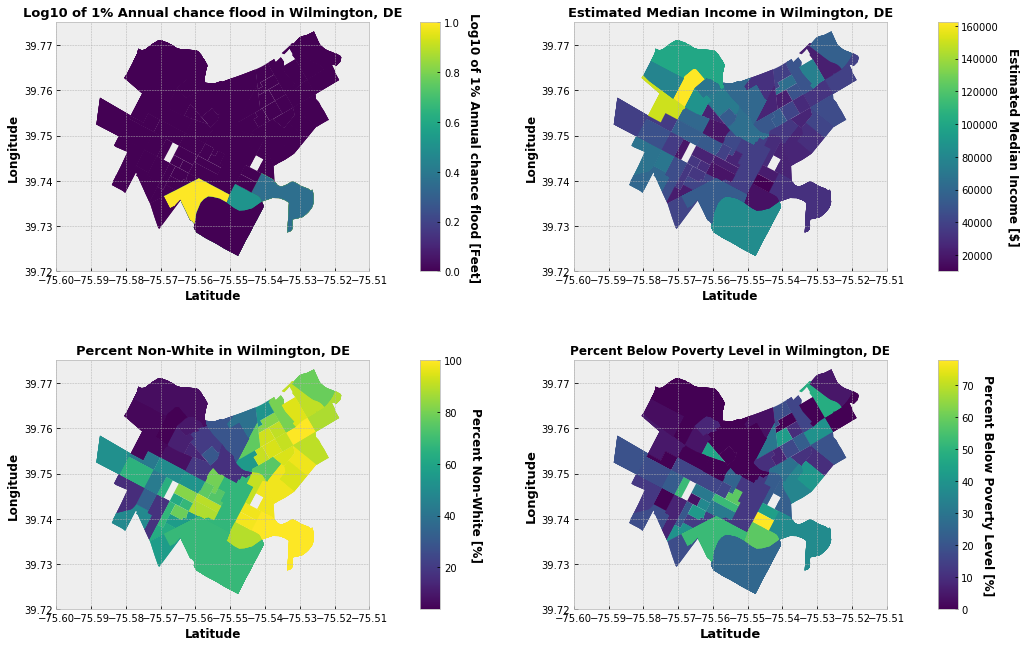

In [29]:
#@Comparison between flood risk and SED data Plot1
fig_nc_data_sub_wm, ax=plt.subplots(nrows=2, ncols=2, figsize=[17, 11])
plot1 = ax[0,0]
plot2 = ax[0,1]
plot3 = ax[1,0]
plot4 = ax[1,1]

#plot1
divider1 = make_axes_locatable(plot1)
cax1 = divider1.append_axes("right", size="5%", pad=0.05) 
nc_data_sub_wil.plot("log_dep", ax=plot1, legend=True, cax=cax1)
plot1.set_xlim(-75.60, -75.51)
plot1.set_ylim(39.72, 39.775)
cax1.set_ylabel("Log10 of 1% Annual chance flood [Feet]", rotation=270, weight="bold", size=12, labelpad=20)
label_plot(plot1, "Log10 of 1% Annual chance flood in Wilmington, DE", "Latitude", "Longitude", axis_size=12, title_size=13)

#plot2
divider2 = make_axes_locatable(plot2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05) 
nc_data_sub_wil.plot("mincome", ax=plot2, legend=True, cax=cax2)
plot2.set_xlim(-75.60, -75.51)
plot2.set_ylim(39.72, 39.775)
cax2.set_ylabel("Estimated Median Income [$]", rotation=270, weight="bold", size=12, labelpad=20)
label_plot(plot2, "Estimated Median Income in Wilmington, DE", "Latitude", "Longitude", axis_size=12, title_size=13)

#plot3
divider3 = make_axes_locatable(plot3)
cax3 = divider3.append_axes("right", size="5%", pad=0.05) 
nc_data_sub_wil.plot("per_nonwhite", ax=plot3, legend=True, cax=cax3)
plot3.set_xlim(-75.60, -75.51)
plot3.set_ylim(39.72, 39.775)
cax3.set_ylabel("Percent Non-White [%]", rotation=270, weight="bold", size=12, labelpad=20)
label_plot(plot3, "Percent Non-White in Wilmington, DE", "Latitude", "Longitude", axis_size=12, title_size=13)

#plot4
divider4 = make_axes_locatable(plot4)
cax4 = divider4.append_axes("right", size="5%", pad=0.05) 
nc_data_sub_wil.plot("per_below_povlev", ax=plot4, legend=True, cax=cax4)
plot4.set_xlim(-75.60, -75.51)
plot4.set_ylim(39.72, 39.775)
cax4.set_ylabel("Percent Below Poverty Level [%]", rotation=270, weight="bold", size=12, labelpad=20)
label_plot(plot4, "Percent Below Poverty Level in Wilmington, DE", "Latitude", "Longitude", title_size=12, axis_size=13)

fig_nc_data_sub_wm.subplots_adjust(wspace=.2, hspace=.3)
fig_nc_data_sub_wm.show()

fig_nc_data_sub_wm.savefig("/content/drive/My Drive/flooding/figure/sppa667")

**Fig 6-4. Geospatial comparison between flood risk and SED data** Based on the geospatial analysis, people living in the low median income household, people not white, and people under poverty line  are living in the flood hazard zone in the City of Wilmington, DE.

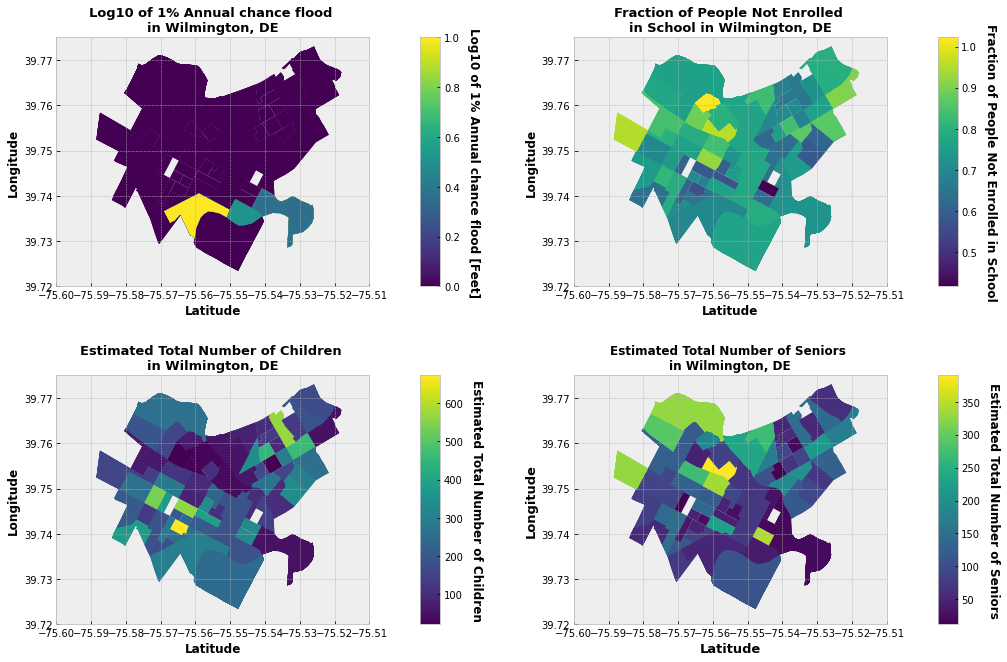

In [30]:
#@Comparison between flood risk and SED data Plot2
fig_nc_data_sub_wm2, ax=plt.subplots(nrows=2, ncols=2, figsize=[17, 11])
plot1 = ax[0,0]
plot2 = ax[0,1]
plot3 = ax[1,0]
plot4 = ax[1,1]

#plot1
divider1 = make_axes_locatable(plot1)
cax1 = divider1.append_axes("right", size="5%", pad=0.05) 
nc_data_sub_wil.plot("log_dep", ax=plot1, legend=True, cax=cax1)
plot1.set_xlim(-75.60, -75.51)
plot1.set_ylim(39.72, 39.775)
cax1.set_ylabel("Log10 of 1% Annual chance flood [Feet]", rotation=270, weight="bold", size=12, labelpad=20)
label_plot(plot1, "Log10 of 1% Annual chance flood \nin Wilmington, DE", "Latitude", "Longitude", axis_size=12, title_size=13)

#plot2
divider2 = make_axes_locatable(plot2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05) 
nc_data_sub_wil.plot("no_school_frac", ax=plot2, legend=True, cax=cax2)
plot2.set_xlim(-75.60, -75.51)
plot2.set_ylim(39.72, 39.775)
cax2.set_ylabel("Fraction of People Not Enrolled in School", rotation=270, weight="bold", size=12, labelpad=20)
label_plot(plot2, "Fraction of People Not Enrolled \nin School in Wilmington, DE", "Latitude", "Longitude", axis_size=12, title_size=13)

#plot3
divider3 = make_axes_locatable(plot3)
cax3 = divider3.append_axes("right", size="5%", pad=0.05) 
nc_data_sub_wil.plot("under18", ax=plot3, legend=True, cax=cax3)
plot3.set_xlim(-75.60, -75.51)
plot3.set_ylim(39.72, 39.775)
cax3.set_ylabel("Estimated Total Number of Children", rotation=270, weight="bold", size=12, labelpad=20)
label_plot(plot3, "Estimated Total Number of Children \nin Wilmington, DE", "Latitude", "Longitude", axis_size=12, title_size=13)

#plot4
divider4 = make_axes_locatable(plot4)
cax4 = divider4.append_axes("right", size="5%", pad=0.05) 
nc_data_sub_wil.plot("over65", ax=plot4, legend=True, cax=cax4)
plot4.set_xlim(-75.60, -75.51)
plot4.set_ylim(39.72, 39.775)
cax4.set_ylabel("Estimated Total Number of Seniors", rotation=270, weight="bold", size=12, labelpad=20)
label_plot(plot4, "Estimated Total Number of Seniors \nin Wilmington, DE", "Latitude", "Longitude", title_size=12, axis_size=13)

fig_nc_data_sub_wm2.subplots_adjust(wspace=.2, hspace=.3)
fig_nc_data_sub_wm2.show()

fig_nc_data_sub_wm2.savefig("/content/drive/My Drive/flooding/figure/sppa667")

**Fig 6-5. Geospatial comparison between flood risk and SED data** Based on the geospatial analysis, people not enrolled in school, children (people under 18 years old), and seniors (people over 65 years old)  are not highly close to the flood hazard zone in the City of Wilmington, DE.

## 5.3. Machine Learning Analysis Result

In order to compare the machine learning techniques, this research applied three ways for improving model accuracy: feature enginnering, multiple algorithms, and algorithm tuning. Firstly, target variable is changed to log10 scale for normalization. Changing the scale of a variable from original scale to scale between zero and one helps to extract moer information from existing data. It may have a higher ability to explain the variance in the training data and giving imporoved model accuracy. Secondly, this research applied multiple machine learning algorithms such as random forest classifier, logistic regression classification, and random forest regressor. As mentioned above, since the classification models are showing the high model accuracy, this research applied regression model to find the better suited algorithm and compare the model accuracy. Lastly, this research tuned the algorithm. By using the library tool, this research find out the optimum value for each parameter to improve the accuracy of the model, which makes the model accuracy better. The result is shown as below.  

In [31]:
#@machine learning model prep
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

plt.style.use("bmh")

In [32]:
# data clean up
data = nc_data_sub_wil
data

,cblockgid,geometry,lat,lon,dep,dep_cl,mincome,per_nonwhite,per_below_povlev,population,no_school,no_school_frac,under18,over65,has_water,has_water_int,log_dep
1254,100030028001,"POLYGON ((-75.55731 39.73991, -75.55730 39.740...",39.746595,-75.551046,0.0,0.0,37550.0,66.979362,12.582781,962.0,750.0,0.779626,184.0,74.0,False,0,0.0
1255,100030028001,"POLYGON ((-75.55731 39.73991, -75.55730 39.740...",39.746595,-75.547510,0.0,0.0,37550.0,66.979362,12.582781,962.0,750.0,0.779626,184.0,74.0,False,0,0.0
1256,100030028001,"POLYGON ((-75.55731 39.73991, -75.55730 39.740...",39.746595,-75.543973,0.0,0.0,37550.0,66.979362,12.582781,962.0,750.0,0.779626,184.0,74.0,False,0,0.0
1257,100030028001,"POLYGON ((-75.55731 39.73991, -75.55730 39.740...",39.743855,-75.551046,0.0,0.0,37550.0,66.979362,12.582781,962.0,750.0,0.779626,184.0,74.0,False,0,0.0
1258,100030028001,"POLYGON ((-75.55731 39.73991, -75.55730 39.740...",39.743855,-75.547510,0.0,0.0,37550.0,66.979362,12.582781,962.0,750.0,0.779626,184.0,74.0,False,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10941,100030023003,"POLYGON ((-75.57454 39.74702, -75.57423 39.747...",39.749335,-75.568730,0.0,0.0,36477.0,43.610935,22.188450,1573.0,1179.0,0.749523,537.0,89.0,False,0,0.0
10942,100030023003,"POLYGON ((-75.57454 39.74702, -75.57423 39.747...",39.746595,-75.572267,0.0,0.0,36477.0,43.610935,22.188450,1573.0,1179.0,0.749523,537.0,89.0,False,0,0.0
12202,100030015001,"POLYGON ((-75.56277 39.75075, -75.56241 39.751...",39.752075,-75.561656,0.0,0.0,18634.0,18.888889,0.000000,810.0,679.0,0.838272,99.0,337.0,True,1,0.0
12203,100030015001,"POLYGON ((-75.56277 39.75075, -75.56241 39.751...",39.752075,-75.558120,0.0,0.0,18634.0,18.888889,0.000000,810.0,679.0,0.838272,99.0,337.0,True,1,0.0


In [33]:
#@ Model preprocessing 

fld_unshuffled = data


fld_values = fld_unshuffled['log_dep'].values 

fld_class_groups = []
for i in fld_values:
  if i == 0:
    fld_class_groups.append(0)
  else:
    fld_class_groups.append(1)

fld_unshuffled['fld_present'] = fld_class_groups

# Set 0 and 1 values 
fld_unshuffled_yes = fld_unshuffled[fld_unshuffled['fld_present']==1].copy()
len(fld_unshuffled_yes)
num_yes = len(fld_unshuffled_yes)

fld_unshuffled_no = fld_unshuffled[fld_unshuffled['fld_present']==0].copy()
len(fld_unshuffled_no)
num_no = fld_unshuffled_no.sample(frac=1, random_state=32)

fld_no_bal = fld_unshuffled_no[:num_yes]
#fld_no_bal = fld_shuffle_no[:num_yes]
fld_bal_unshuffled = fld_unshuffled_yes.append(fld_no_bal)
fld_bal_shuffle = fld_bal_unshuffled.sample(frac=1, random_state=17)
fld_bal_shuffle.columns
fld_unshuffled.describe()

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,lat,lon,dep,dep_cl,mincome,per_nonwhite,per_below_povlev,population,no_school,no_school_frac,under18,over65,has_water_int,log_dep,fld_present
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,39.750172,-75.553137,0.516256,0.516256,55261.177340,57.237379,18.446325,967.147783,727.669951,0.756534,200.970443,135.093596,0.285714,0.066267,0.108374
std,0.011163,0.016557,1.620714,1.620714,30641.633629,32.408620,17.069917,315.344881,232.317797,0.087995,128.113460,98.604802,0.452871,0.203469,0.311621
min,39.724676,-75.586413,0.000000,0.000000,10177.000000,3.810976,0.000000,389.000000,280.000000,0.417404,21.000000,12.000000,0.000000,0.000000,0.000000
25%,39.741115,-75.565193,0.000000,0.000000,32206.000000,20.620621,2.692308,719.500000,576.000000,0.701105,99.000000,64.000000,0.000000,0.000000,0.000000
50%,39.752075,-75.554583,0.000000,0.000000,47976.000000,66.979362,16.071429,962.000000,745.000000,0.762509,187.000000,108.000000,0.000000,0.000000,0.000000
75%,39.760295,-75.540436,0.000000,0.000000,69403.500000,88.115942,28.991597,1141.000000,876.000000,0.793226,261.000000,178.000000,1.000000,0.000000,0.000000
max,39.771255,-75.519216,10.000000,10.000000,162143.000000,100.000000,77.600000,1792.000000,1179.000000,1.022071,673.000000,390.000000,1.000000,1.000000,1.000000


Text(0.5, 0, 'Distribution of the 1% Annual Chance Flood Risk')

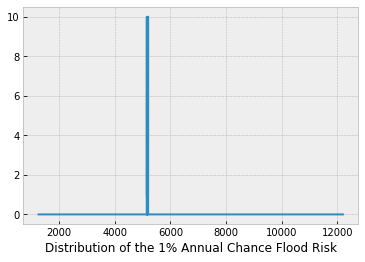

In [34]:
#@ why Random forest classifier and Logistic regression classification did not fit
plt.plot(fld_unshuffled.dep_cl)
plt.xlabel("Distribution of the 1% Annual Chance Flood Risk")

**Fig 7-1. Distribution of the 1% Annual Chance Flood Risk** This figure shows the flood risk data is not equally distributed. This makes random forest classifier and logistic regression classification did not fit in this research. It makes the target variable too easy to be predicted.

###5.3.1. Random Forest Classifier

Random Forest Classifier
* Objects: Census block groups
* Features:Estimated median income, Percent of population that is not white people, Percent of people below the poverty line, Fraction of people who is not enrolled in school, Estimated total number of children (age under 18), Estimated total number of seniors (age over 65), Water area (where the fraction of the current water area is over 0.05)
* Target: Presence or absence of flood risk (Binary)

Initial RFC Model (all features) Results: 
Initial RFC model (all features) training accuracy: 1.000
Initial RFC model (all features) testing accuracy: 1.000

Importances for Initial RFC model (all features):
            Feature  Importance
6     has_water_int    0.369141
2  per_below_povlev    0.214451
3    no_school_frac    0.160790
5            over65    0.096067
0           mincome    0.066504
4           under18    0.059988
1      per_nonwhite    0.033059


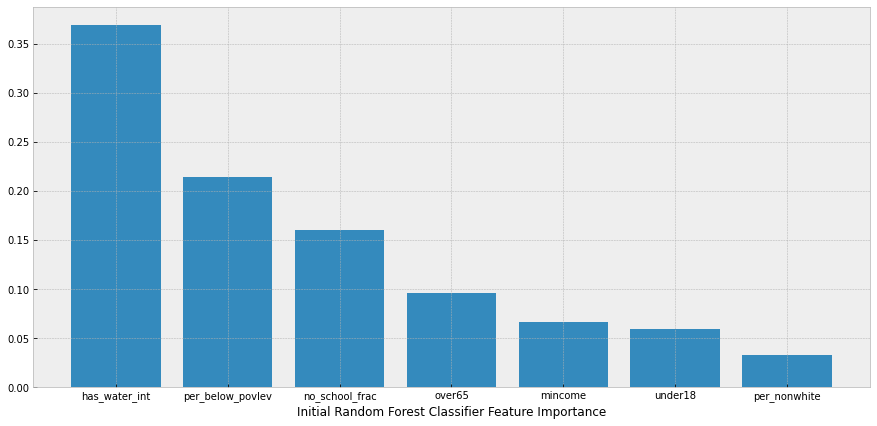

In [35]:
#@RFC model - Initial 

#Set feature, target
feat_class = fld_bal_shuffle[['mincome', 'per_nonwhite', 'per_below_povlev', 'no_school_frac', 'under18', 'over65', 'has_water_int']].copy()
targ_class = fld_bal_shuffle["fld_present"].values

feat_tr_class, feat_te_class, targ_tr_class, targ_te_class = train_test_split(feat_class, targ_class, test_size=0.2, random_state=71)
# feat_tr_class = x_train
# targ_tr_class = y_train

# Model - Initial
rfc = RandomForestClassifier(random_state = 0, n_jobs = -1)
rfc.fit(feat_tr_class, targ_tr_class)

pred_tr_class = rfc.predict(feat_tr_class)
pred_te_class = rfc.predict(feat_te_class)

# Model accuracy
fld_tr_acc = accuracy_score(targ_tr_class, pred_tr_class)
fld_te_acc = accuracy_score(targ_te_class, pred_te_class)

print("Initial RFC Model (all features) Results: ")
print("Initial RFC model (all features) training accuracy: {:.3f}".format(fld_tr_acc))
print("Initial RFC model (all features) testing accuracy: {:.3f}".format(fld_te_acc))

# Model feature importances
importances_class = rfc.feature_importances_

imp_class = pd.DataFrame()
imp_class["Feature"] = feat_class.columns
imp_class["Importance"] = importances_class
imp_class =imp_class.sort_values("Importance", ascending=False)
print("")
print("Importances for Initial RFC model (all features):")
print(imp_class)

# Figure
fig, ax = plt.subplots(figsize=[15,7])
ax = plt.bar(imp_class.Feature, imp_class.Importance)
ax = plt.xlabel("Initial Random Forest Classifier Feature Importance")

Since the initial RFC model shows 100% accuracy, this research tried to tune hyper paramter by using GridSearchCV

In [36]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }


rfc_tune = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rfc_tune, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(feat_tr_class, targ_tr_class)

print('The optimum value of hyperparameters: ', grid_cv.best_params_)
print('The best score: {:.4f}'.format(grid_cv.best_score_))

The optimum value of hyperparameters:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
The best score: 0.6641


Final RFC Model (all features) Results: 
Final RFC model (all features) training accuracy: 0.943
Final RFC model (all features) testing accuracy: 1.000

Final Importances for final RFC model (all features):
            Feature  Importance
6     has_water_int    0.280000
2  per_below_povlev    0.279989
3    no_school_frac    0.180000
0           mincome    0.086881
5            over65    0.080000
1      per_nonwhite    0.064733
4           under18    0.028396


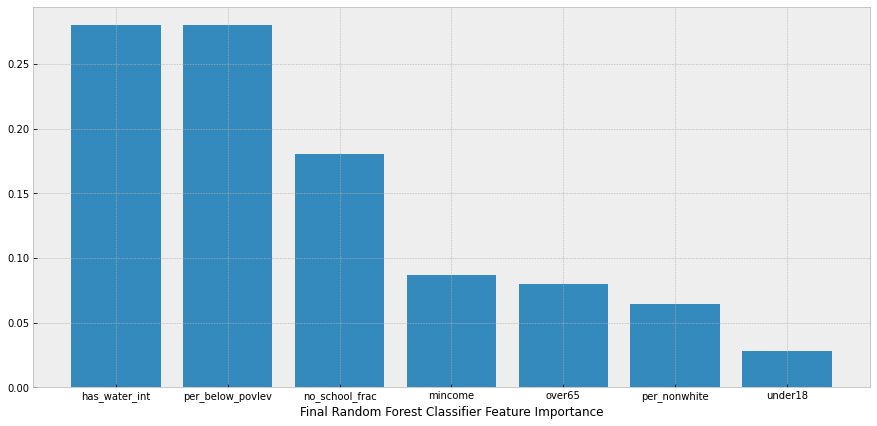

In [37]:
#@RFC model - alrorithm tuning

#Set feature, target
feat_class_best = fld_bal_shuffle[['mincome', 'per_nonwhite', 'per_below_povlev', 'no_school_frac', 'under18', 'over65', 'has_water_int']].copy()
targ_class_best = fld_bal_shuffle["fld_present"].values

feat_tr_class_best, feat_te_class_best, targ_tr_class_best, targ_te_class_best = train_test_split(feat_class_best, targ_class_best, test_size=0.2, random_state=71)

# Model - Initial
rfc_best = RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=100)
rfc_best.fit(feat_tr_class_best, targ_tr_class_best)

pred_tr_class_best = rfc_best.predict(feat_tr_class_best)
pred_te_class_best = rfc_best.predict(feat_te_class_best)

# Model accuracy
fld_tr_acc_best = accuracy_score(targ_tr_class_best, pred_tr_class_best)
fld_te_acc_best = accuracy_score(targ_te_class_best, pred_te_class_best)

print("Final RFC Model (all features) Results: ")
print("Final RFC model (all features) training accuracy: {:.3f}".format(fld_tr_acc_best))
print("Final RFC model (all features) testing accuracy: {:.3f}".format(fld_te_acc_best))

# Model feature importances
importances_best = rfc_best.feature_importances_

imp_class_best = pd.DataFrame()
imp_class_best["Feature"] = feat_class.columns
imp_class_best["Importance"] = importances_best
imp_class_best =imp_class_best.sort_values("Importance", ascending=False)
print("")
print("Final Importances for final RFC model (all features):")
print(imp_class_best)

# Figure
fig, ax = plt.subplots(figsize=[15,7])
ax = plt.bar(imp_class_best.Feature, imp_class_best.Importance)
ax = plt.xlabel("Final Random Forest Classifier Feature Importance")

**Fig 8-1. Random Forest Classifier Feature Importance** This figure shows the most important features in the random forest classifier model. The water areas shows the highest importance. People not enrolled in school, people underder the poverty line,  over 65 years old, people living in the low median income household, people not white, and people under 18 years old are following in order. 

In [38]:
# RFC Model without demographic features

feat_class.columns

feat_class_nondemographic = feat_class[['has_water_int']].copy()
feat_tr_class_nondem, feat_te_class_nondem, targ_tr_class, targ_te_class = train_test_split(feat_class_nondemographic, targ_class, test_size=0.2, random_state=71)

rfc_init_nondem = RandomForestClassifier(random_state=0, max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=100) 
rfc_init_nondem.fit(feat_tr_class_nondem, targ_tr_class)

pred_tr_class_nondem = rfc_init_nondem.predict(feat_tr_class_nondem)
pred_te_class_nondem = rfc_init_nondem.predict(feat_te_class_nondem)

fld_tr_acc_init_nondem = accuracy_score(targ_tr_class, pred_tr_class_nondem)
fld_te_acc_init_nondem = accuracy_score(targ_te_class, pred_te_class_nondem)

print("Final RFC Model (without SED features) Results:")
print("Final RFC model training accuracy (without SED features): {:.3f}".format(fld_tr_acc_init_nondem))
print("Final RFC model testing accuracy (without SED features): {:.3f}".format(fld_te_acc_init_nondem))
print("")
print("RFC Model Comparison:")
print("Percent change in testing accuracy with addition of SED features:" + str(((fld_te_acc_best - fld_te_acc_init_nondem)/fld_te_acc_init_nondem)*100)[:5] + "%")

Final RFC Model (without SED features) Results:
Final RFC model training accuracy (without SED features): 1.000
Final RFC model testing accuracy (without SED features): 1.000

RFC Model Comparison:
Percent change in testing accuracy with addition of SED features:0.0%


###5.3.2. Logistic Regression Classification

Logistic Regression
* Objects: Census block groups
* Features:Estimated median income, Percent of population that is not white people, Percent of people below the poverty line, Fraction of people who is not enrolled in school, Estimated total number of children (age under 18), Estimated total number of seniors (age over 65), Water area (where the fraction of the current water area is over 0.05)
* Target: Presence or absence of flood risk (Binary)


In [39]:
#@Logistic regression classification model

# Set feature, target

feat_fld_lrc = fld_bal_shuffle[['mincome', 'per_nonwhite', 'per_below_povlev', 'no_school_frac', 'under18', 'over65', 'has_water_int']].copy()
targ_fld_lrc = fld_bal_shuffle["fld_present"].values

feat_tr_fld_class, feat_te_fld_class, targ_tr_fld_class, targ_te_fld_class = train_test_split(feat_fld_lrc, targ_fld_lrc, test_size=0.2, random_state=71)

# LRC model
lr_fld = LogisticRegression(random_state=0)
lr_fld.fit(feat_tr_fld_class, targ_tr_fld_class)

pred_lr_fld_tr = lr_fld.predict(feat_tr_fld_class)
pred_lr_fld_te = lr_fld.predict(feat_te_fld_class)

#model accuracy
lr_fld_tr_acc_init = accuracy_score(targ_tr_fld_class, pred_lr_fld_tr)
lr_fld_te_acc_init = accuracy_score(targ_te_fld_class, pred_lr_fld_te)
print("Final Logistic Regression (LR) Model (all features) Results:")
print("Final LR model (all features) training accuracy: {:.3f}".format(lr_fld_tr_acc_init))
print("Final LR model (all features) testing accuracy: {:.3f}".format(lr_fld_te_acc_init))
print("")

# Coefficient
coefficients_fld_class = lr_fld.coef_[0]
lr_fld_coef= pd.DataFrame()
lr_fld_coef["Feature"] = feat_fld_lrc.columns
lr_fld_coef["Coefficient"] = coefficients_fld_class
lr_fld_coef["abs"] = lr_fld_coef["Coefficient"].abs()
lr_fld_coef =lr_fld_coef.sort_values("abs", ascending=False)
lr_fld_coef = lr_fld_coef[["Feature", "Coefficient"]]
print(lr_fld_coef)
print("")
print("")

Final Logistic Regression (LR) Model (all features) Results:
Final LR model (all features) training accuracy: 1.000
Final LR model (all features) testing accuracy: 1.000

            Feature  Coefficient
2  per_below_povlev     0.568711
5            over65    -0.416427
1      per_nonwhite    -0.231284
4           under18     0.101350
6     has_water_int     0.020727
3    no_school_frac    -0.003687
0           mincome     0.000349




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
# Hyperparameter tuning
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lr_fld=LogisticRegression()
lr_fld_cv=GridSearchCV(lr_fld,grid,cv=10)
lr_fld_cv.fit(feat_tr_fld_class, targ_tr_fld_class)
print("tuned hpyerparameters :(best parameters) ",lr_fld_cv.best_params_)
print("accuracy :",lr_fld_cv.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [41]:
lr_fld_best = LogisticRegression(C=0.01, penalty="l2")
lr_fld_best.fit(feat_tr_fld_class, targ_tr_fld_class)
print("score", lr_fld_best.score(feat_te_fld_class, targ_te_fld_class))

score 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 5.3.3. Random Forest Regressor

The random forest classifier and the logistic regression classification show the 100% testing and training accuracy. It means it is too easy to be classified. Therefore, the model is needed to be changed to the random forest regressor to make the diversified target variables (not binary).

* Target: 1% annual chance flood risk (multilevel)

* Objects: Census block groups

* Features:Estimated median income, Percent of population that is not white people, Percent of people below the poverty line, Fraction of people who is not enrolled in school, Estimated total number of children (age under 18), Estimated total number of seniors (age over 65), Water area (where the fraction of the current water area is over 0.05)





In [42]:
#@RFR model 

# model prep
import seaborn
%pylab inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [43]:
#@RFR model - Set feature, target
feat_rfr = fld_bal_shuffle[['mincome', 'per_nonwhite', 'per_below_povlev', 'no_school_frac', 'under18', 'over65', 'has_water_int']].copy()
targ_rfr = fld_bal_shuffle["fld_present"].values

feat_tr_rfr, feat_te_rfr, targ_tr_rfr, targ_te_rfr = train_test_split(feat_rfr, targ_rfr, test_size=0.2, random_state=71)

targ_tr_rfr_var = targ_tr_rfr.var(ddof=0)
targ_te_rfr_var = targ_te_rfr.var(ddof=0)

print("Random Forest Regressor")
print("Training data target variance: {:.3f}".format(targ_tr_rfr_var))
print("Testing data target variance: {:.3f}".format(targ_te_rfr_var))
print("")

#@Initial Random Forest Regressor Model
print("Initial RFR Model Results (all features):")
rfr = RandomForestRegressor(random_state=314)
rfr.fit(feat_tr_rfr, targ_tr_rfr)

pred_tr_rfr_init = rfr.predict(feat_tr_rfr)
pred_te_rfr_init = rfr.predict(feat_te_rfr)

mse_tr_init = mean_squared_error(targ_tr_rfr, pred_tr_rfr_init)
mse_te_init = mean_squared_error(targ_te_rfr, pred_te_rfr_init)
print("Initial model MSE for training data: {:.3f}".format(mse_tr_init))
print("Initial model MSE for testing data: {:.3f}".format(mse_te_init))

mse_var_tr_init = mse_tr_init/targ_tr_rfr_var
mse_var_te_init = mse_te_init/targ_te_rfr_var
print("Initial model MSE/var for training data: {:.3f}".format(mse_var_tr_init))
print("Initial model MSE/var for testing data: {:.3f}".format(mse_var_te_init))

Random Forest Regressor
Training data target variance: 0.248
Testing data target variance: 0.222

Initial RFR Model Results (all features):
Initial model MSE for training data: 0.000
Initial model MSE for testing data: 0.000
Initial model MSE/var for training data: 0.000
Initial model MSE/var for testing data: 0.000


In [44]:
# Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(feat_tr_rfr, targ_tr_rfr)

rf_random.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished


{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [45]:
#@Final Random Forest Regressor - algorithm tuning
print("Final RFR Model Results (all features)")

feat_rfr = fld_bal_shuffle[['mincome', 'per_nonwhite', 'per_below_povlev', 'no_school_frac', 'under18', 'over65', 'has_water_int']].copy()
targ_rfr = fld_bal_shuffle["fld_present"].values

feat_tr_rfr, feat_te_rfr, targ_tr_rfr, targ_te_rfr = train_test_split(feat_rfr, targ_rfr, test_size=0.2, random_state=71)

targ_tr_rfr_var = targ_tr_rfr.var(ddof=0)
targ_te_rfr_var = targ_te_rfr.var(ddof=0)

rfr_best = RandomForestRegressor(random_state=0, bootstrap=False, max_depth=30, max_features='auto', min_samples_leaf=4,min_samples_split=2,n_estimators=2000)
rfr_best.fit(feat_tr_rfr, targ_tr_rfr)

pred_tr_rfr_best = rfr_best.predict(feat_tr_rfr)
pred_te_rfr_best = rfr_best.predict(feat_te_rfr)

mse_tr_best = mean_squared_error(targ_tr_rfr, pred_tr_rfr_best)
mse_te_best = mean_squared_error(targ_te_rfr, pred_te_rfr_best)
print("Final model (all features) MSE for training data: {:.3f}".format(mse_tr_best))
print("Final model (all features) MSE for testing data: {:.3f}".format(mse_te_best))

mse_var_tr_best = mse_tr_best/targ_tr_rfr_var
mse_var_te_best = mse_te_best/targ_te_rfr_var
print("Final model (all features) MSE/var for training data: {:.3f}".format(mse_var_tr_best))
print("Final model (all features) MSE/var for testing data:  {:.3f}".format(mse_var_tr_best))

#@Check RFR model change
print("mean sq error of the model on training data {:.2f} ({:.0f}%)".format(mse_tr_best, mse_tr_best * 100))
print("mean sq error of the model on test data {:.2f} ({:.0f}%)".format(mse_var_tr_best, mse_var_tr_best * 100))

#@RFR model importances 
#importances
rfr_te_best_r2 = rfr_best.score(feat_te_rfr, targ_te_rfr)
print("Final model (all features) coefficient of determination (R^2): {:.3f}".format(rfr_te_best_r2))

importances = rfr_best.feature_importances_
imp_rfr = pd.DataFrame()
imp_rfr["Feature"] = feat_tr_rfr.columns
imp_rfr["Importance"] = importances
imp_rfr =imp_rfr.sort_values("Importance", ascending=False)
print("\n")
print(imp_rfr)


Final RFR Model Results (all features)
Final model (all features) MSE for training data: 0.000
Final model (all features) MSE for testing data: 0.000
Final model (all features) MSE/var for training data: 0.000
Final model (all features) MSE/var for testing data:  0.000
mean sq error of the model on training data 0.00 (0%)
mean sq error of the model on test data 0.00 (0%)
Final model (all features) coefficient of determination (R^2): 1.000


            Feature  Importance
6     has_water_int         1.0
0           mincome         0.0
1      per_nonwhite         0.0
2  per_below_povlev         0.0
3    no_school_frac         0.0
4           under18         0.0
5            over65         0.0


Final RFR Model Results (all features)
Final model (all features) MSE for training data: 0.092
Final model (all features) MSE for testing data: 0.077
Final model (all features) MSE/var for training data: 0.371
Final model (all features) MSE/var for testing data:  0.371
mean sq error of the model on training data 0.09 (9%)
mean sq error of the model on test data 0.37 (37%)
Final model (all features) coefficient of determination (R^2): 0.653


            Feature  Importance
2  per_below_povlev    0.292683
6     has_water_int    0.219512
3    no_school_frac    0.207317
1      per_nonwhite    0.134146
0           mincome    0.060976
5            over65    0.048780
4           under18    0.036585


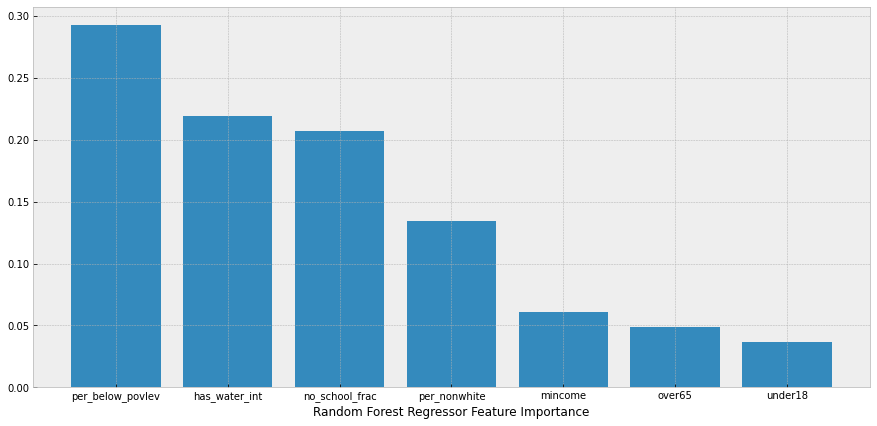

In [46]:
# Random Forest Regressor - adjust the model
print("Final RFR Model Results (all features)")
rfr_best = RandomForestRegressor(random_state=302, max_depth=3, min_samples_leaf=10, max_features=2)
rfr_best.fit(feat_tr_rfr, targ_tr_rfr)

pred_tr_rfr_best = rfr_best.predict(feat_tr_rfr)
pred_te_rfr_best = rfr_best.predict(feat_te_rfr)

mse_tr_best = mean_squared_error(targ_tr_rfr, pred_tr_rfr_best)
mse_te_best = mean_squared_error(targ_te_rfr, pred_te_rfr_best)
print("Final model (all features) MSE for training data: {:.3f}".format(mse_tr_best))
print("Final model (all features) MSE for testing data: {:.3f}".format(mse_te_best))

mse_var_tr_best = mse_tr_best/targ_tr_rfr_var
mse_var_te_best = mse_te_best/targ_te_rfr_var
print("Final model (all features) MSE/var for training data: {:.3f}".format(mse_var_tr_best))
print("Final model (all features) MSE/var for testing data:  {:.3f}".format(mse_var_tr_best))

print("mean sq error of the model on training data {:.2f} ({:.0f}%)".format(mse_tr_best, mse_tr_best * 100))
print("mean sq error of the model on test data {:.2f} ({:.0f}%)".format(mse_var_tr_best, mse_var_tr_best * 100))

# importances
rfr_te_best_r2 = rfr_best.score(feat_te_rfr, targ_te_rfr)
print("Final model (all features) coefficient of determination (R^2): {:.3f}".format(rfr_te_best_r2))

importances = rfr_best.feature_importances_
imp_rfr = pd.DataFrame()
imp_rfr["Feature"] = feat_tr_rfr.columns
imp_rfr["Importance"] = importances
imp_rfr =imp_rfr.sort_values("Importance", ascending=False)
print("\n")
print(imp_rfr)

importances = rfr_best.feature_importances_

imp_rfr = pd.DataFrame()
imp_rfr["Feature"] = feat_rfr.columns
imp_rfr["Importance"] = importances
imp_rfr =imp_rfr.sort_values("Importance", ascending=False)

fig, ax = plt.subplots(figsize=[15,7])
ax = plt.bar(imp_rfr.Feature, imp_rfr.Importance)
ax = plt.xlabel("Random Forest Regressor Feature Importance")

**Fig 8-2. Random Forest Regressor Feature Importance** This figure shows the most important features in the random forest regressor model. The people living under the poverty line shows the highest importance. The water areas, people not enrolled in school, peole not white, people living in the low median income household, people over 65 years old, and people under 18 years old are following in order. 

#6.Discussion and Conclusion

The data exploration result shows that the flood risk and socioecnomic and demographic data are not equally distributed. The correlation between the 1% annual chance flood risk and percentage of people not white, and the percentage of the people below poverty line are highly correlated. 

According to the geospatial analysis result, the vulnerable people is exposed to the flood risk in the Wilmington, Delaware. People in the low median income household, people not-white, and  people under poverty line are exposed to the flood risk. The geospatial analysis result implies that the state government officers, policy makers, and researchers may have to consider the vulnerable people and flood risk in the local climate adaptation policy.

However, the random forest classifier and the logistic regression classification show too high model accuracy, while the random forest regressor shows too low model accuracy. This research aims to compare the models by feature engineering, multiple algorithms, and algorithms tuning.The random forest classifier and the logistic regression classification show too high accuracy, which means it is too easy to be classified. Therefore, the model is  changed to the random forest regressor and tuned for improving the accuracy. Nevertheless, the result is not significant. The reason of this issue can be occurred because of the quality of the data in that the number of the object in the model is only 203 census block groups.  

Overall, in the urban evidence-based policy context, policy makers can consider the analysis result as a factor for the policy intervention during the policy-making decision process. Since the flood risk is highly linked to climate change, which is reporetd to make sea level rise in the long term, the flood risk is considered in the climate policy nationally and internationally. 

There are significant limitations in this research. First, in terms of the middle size of the urban city, it is limited to get diversified dataset of the flood depth grid from the open data source platform. Second, since the accuracy of the RFR machine learning model is very low, the model should be more adjusted. Lastly, the flood risk depth raster data has limitation information of how it is collected. For the future study, the machine learming model should be adjusted to increase model accuracy. To expand the research, the New York City can be researched for the further study.









# Bibilography

* Androutsopoulou, A., & Charalabidis, Y. (2018, April) A framework for evidence based policy making combining big data, dynamic modelling and machine intelligence. In Proceedings of the 11th International Conference on Theory and Practice of Electronic Governance (pp. 575-583).

* Chakraborty, Liton, Horatiu Rus, Daniel Henstra, Jason Thistlethwaite, and Daniel Scott. 2020. “A Place-Based Socioeconomic Status Index: Measuring Social Vulnerability to Flood Hazards in the Context of Environmental Justice.” International Journal of Disaster Risk Reduction 43 (November 2019): 101394. https://doi.org/10.1016/j.ijdrr.2019.101394.

* Darabi, Hamid, Bahram Choubin, Omid Rahmati, Ali Torabi Haghighi, Biswajeet Pradhan, and Bjørn Kløve. 2019. “Urban Flood Risk Mapping Using the GARP and QUEST Models: A Comparative Study of Machine Learning Techniques.” Journal of Hydrology 569 (February 2018): 142–54. https://doi.org/10.1016/j.jhydrol.2018.12.002.

* Eini, Mohammad, Hesam Seyed Kaboli, Mohsen Rashidian, and Hossien Hedayat. 2020. “Hazard and Vulnerability in Urban Flood Risk Mapping: Machine Learning Techniques and Considering the Role of Urban Districts.” International Journal of Disaster Risk Reduction 50 (May): 101687. https://doi.org/10.1016/j.ijdrr.2020.101687.

* Eisenman, David P., Kristina M. Cordasco, Steve Asch, Joya F. Golden, and Deborah Glik. "Disaster planning and risk communication with vulnerable communities: lessons from Hurricane 

* Katrina." American journal of public health 97, no. Supplement_1 (2007): S109-S115.

* Mosavi, Amir, Pinar Ozturk, and Kwok Wing Chau. 2018. “Flood Prediction Using Machine Learning Models: Literature Review.” Water (Switzerland) 10 (11): 1–40. https://doi.org/10.3390/w10111536.

* Rahmati, Omid, Ali Golkarian, Trent Biggs, Saskia Keesstra, Farnoush Mohammadi, and Ioannis N. Daliakopoulos. 2019. “Land Subsidence Hazard Modeling: Machine Learning to Identify Predictors and the Role of Human Activities.” Journal of Environmental Management 236 (February): 466–80. https://doi.org/10.1016/j.jenvman.2019.02.020.

* Silva, M. M.G.T. De, and Akiyuki Kawasaki. 2020. “A Local-Scale Analysis to Understand Differences in Socioeconomic Factors Affecting Economic Loss Due to Floods among Different Communities.” International Journal of Disaster Risk Reduction 47: 101526. https://doi.org/10.1016/j.ijdrr.2020.101526.

* Straf, M. L., Prewitt, K., & Schwandt, T. A. (2012) Using science as evidence in public policy.

* Walker, Gordon, and Kate Burningham. "Flood risk, vulnerability and environmental justice: evidence and evaluation of inequality in a UK context." Critical social policy 31, no. 2 (2011): 216-240.

* Maantay, Juliana, and Andrew Maroko. "Mapping urban risk: Flood hazards, race, & environmental justice in New York." Applied Geography 29, no. 1 (2009): 111-124.





